In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from pandas import read_excel, DataFrame, Series
from numpy.random import seed
from scipy import stats
import warnings
import csv
import io
warnings.filterwarnings("ignore")

In [4]:
x_bp = pd.read_excel('/X_bp.xlsx', index_col=0)
x_bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [5]:
x_bp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [6]:
x_nup = pd.read_excel('/X_nup.xlsx', index_col=0)
x_nup.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,4.0,57.0
1,0,4.0,60.0
2,0,4.0,70.0
3,0,5.0,47.0
4,0,5.0,57.0


In [7]:
x_nup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1039
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   int64  
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 32.5 KB


In [8]:
df = x_bp.merge(x_nup, how = 'inner', left_index = True, right_index = True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [9]:
a =df.describe()
a.T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


**Удаление выбросов.**
Пропуски в данных отсутствуют. Значит, сразу приступаем к работе с выбросами Шаг 1 Удаление выбросов. Посчитаем, сколько значений у нас в каждом столбце выбивающихся из распределения.

In [10]:
df.shape

(1023, 13)

In [11]:
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Количество выбросов в столбце  Соотношение матрица-наполнитель :  6
Количество выбросов в столбце  Плотность, кг/м3 :  9
Количество выбросов в столбце  модуль упругости, ГПа :  2
Количество выбросов в столбце  Количество отвердителя, м.% :  14
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  2
Количество выбросов в столбце  Температура вспышки, С_2 :  8
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  2
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  6
Количество выбросов в столбце  Прочность при растяжении, МПа :  11
Количество выбросов в столбце  Потребление смолы, г/м2 :  8
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  4
Количество выбросов в столбце  Плотность нашивки :  21


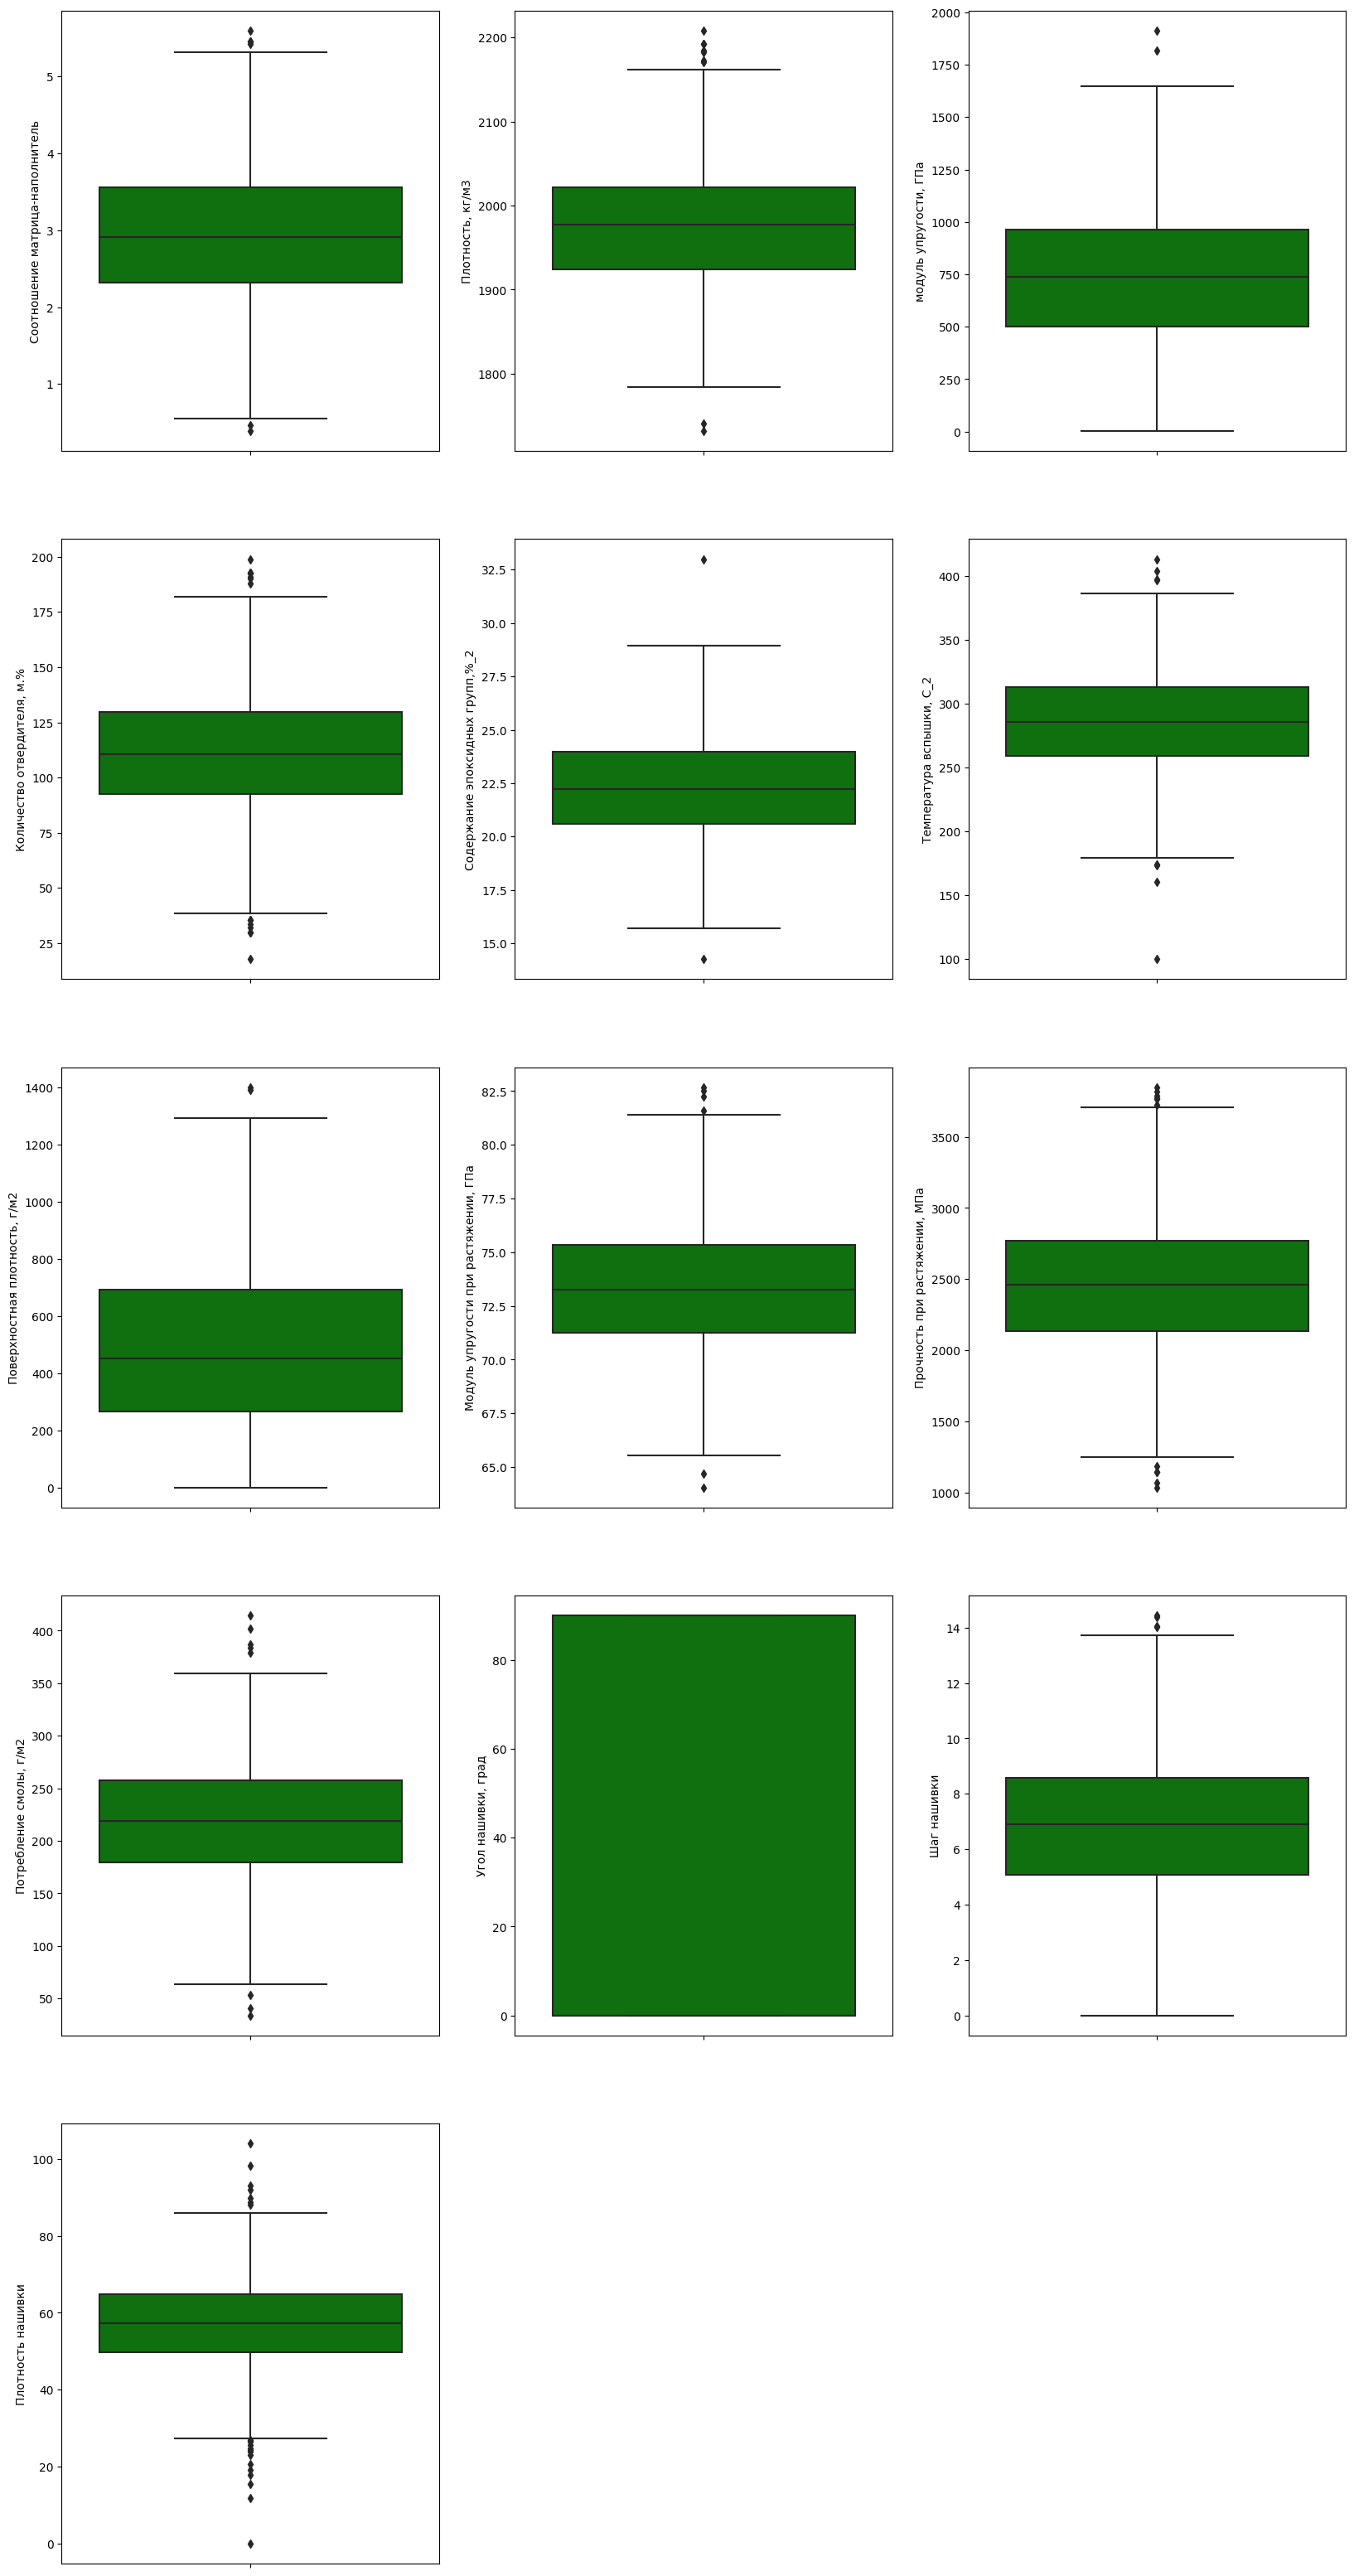

In [12]:
# оценка наличия,количества выбросов в столбцах исходного dataset
plt.figure(figsize=(20, 40))
i=1 
for name in df.columns:
    plt.subplot(5,3,i)
    sns.boxplot(y=df[name], color = 'g')
    outlier = boxplot_stats(df[name])
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    i +=1

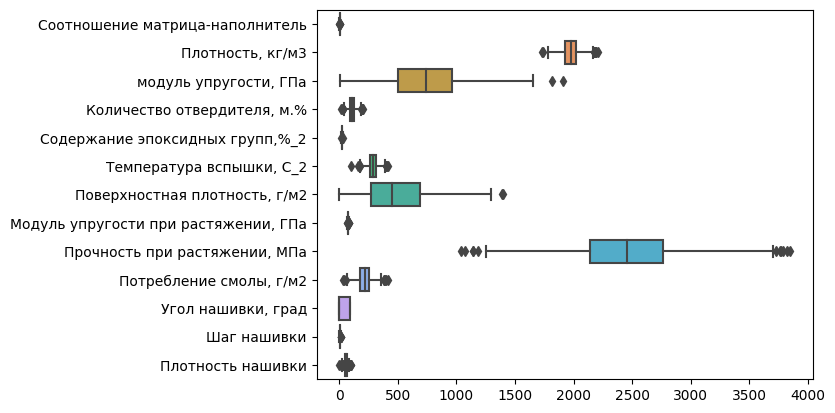

In [13]:
sns.boxplot(data = df, orient="h")
plt.show()

Для удаления выбросов существует 2 основных метода - метод 3-х сигм и межквартильных расстояний

In [14]:
metod_3s = 0
metod_iq = 0
count_iq = [] # Список, куда записывается количество выбросов по каждой колонке датафрейма методом.
count_3s = [] # Список, куда записывается количество выбросов по каждой колонке датафрейма.
for column in df:
    d = df.loc[:, [column]]
# методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    metod_3s += d['3s'].sum()
    count_3s.append(d['3s'].sum())
print(column,'3s', ': ', d['3s'].sum())
# методом межквартильных расстояний
q1 = np.quantile(df[column], 0.25)
q3 = np.quantile(df[column], 0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
d['iq'] = (df[column] <= lower) | (df[column] >= upper)
metod_iq += d['iq'].sum()
count_iq.append(d['iq'].sum())
print(column, ': ', d['iq'].sum())
print('Метод 3-х сигм, выбросов:', metod_3s)
print('Метод межквартильных расстояний, выбросов:', metod_iq)

Плотность нашивки 3s :  7
Плотность нашивки :  21
Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 21




Так же для удаления выбросов можно использовать вот эту формулу, но мне привычней вариант выше

Посмотрим на сумму выбросов по каждому из столбцов


In [15]:
# удаление аномалий из исходного dataset

df_clean = df.copy()
print(df_clean.shape)
for name in df_clean.columns:
    outlier = boxplot_stats(df_clean[name])
    High = outlier[0]['whishi']
    Low =  outlier[0]['whislo']
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    df_clean = df_clean[~((df_clean[name] < Low) | (df_clean[name] > High))]
print(df_clean.shape) 

(1023, 13)
Количество выбросов в столбце  Соотношение матрица-наполнитель :  6
Количество выбросов в столбце  Плотность, кг/м3 :  9
Количество выбросов в столбце  модуль упругости, ГПа :  2
Количество выбросов в столбце  Количество отвердителя, м.% :  14
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  2
Количество выбросов в столбце  Температура вспышки, С_2 :  6
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  2
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  5
Количество выбросов в столбце  Прочность при растяжении, МПа :  14
Количество выбросов в столбце  Потребление смолы, г/м2 :  5
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  4
Количество выбросов в столбце  Плотность нашивки :  22
(932, 13)


Количество выбросов в столбце  Соотношение матрица-наполнитель :  0
Количество выбросов в столбце  Плотность, кг/м3 :  0
Количество выбросов в столбце  модуль упругости, ГПа :  0
Количество выбросов в столбце  Количество отвердителя, м.% :  0
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  0
Количество выбросов в столбце  Температура вспышки, С_2 :  0
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  0
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  0
Количество выбросов в столбце  Прочность при растяжении, МПа :  1
Количество выбросов в столбце  Потребление смолы, г/м2 :  0
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  0
Количество выбросов в столбце  Плотность нашивки :  2


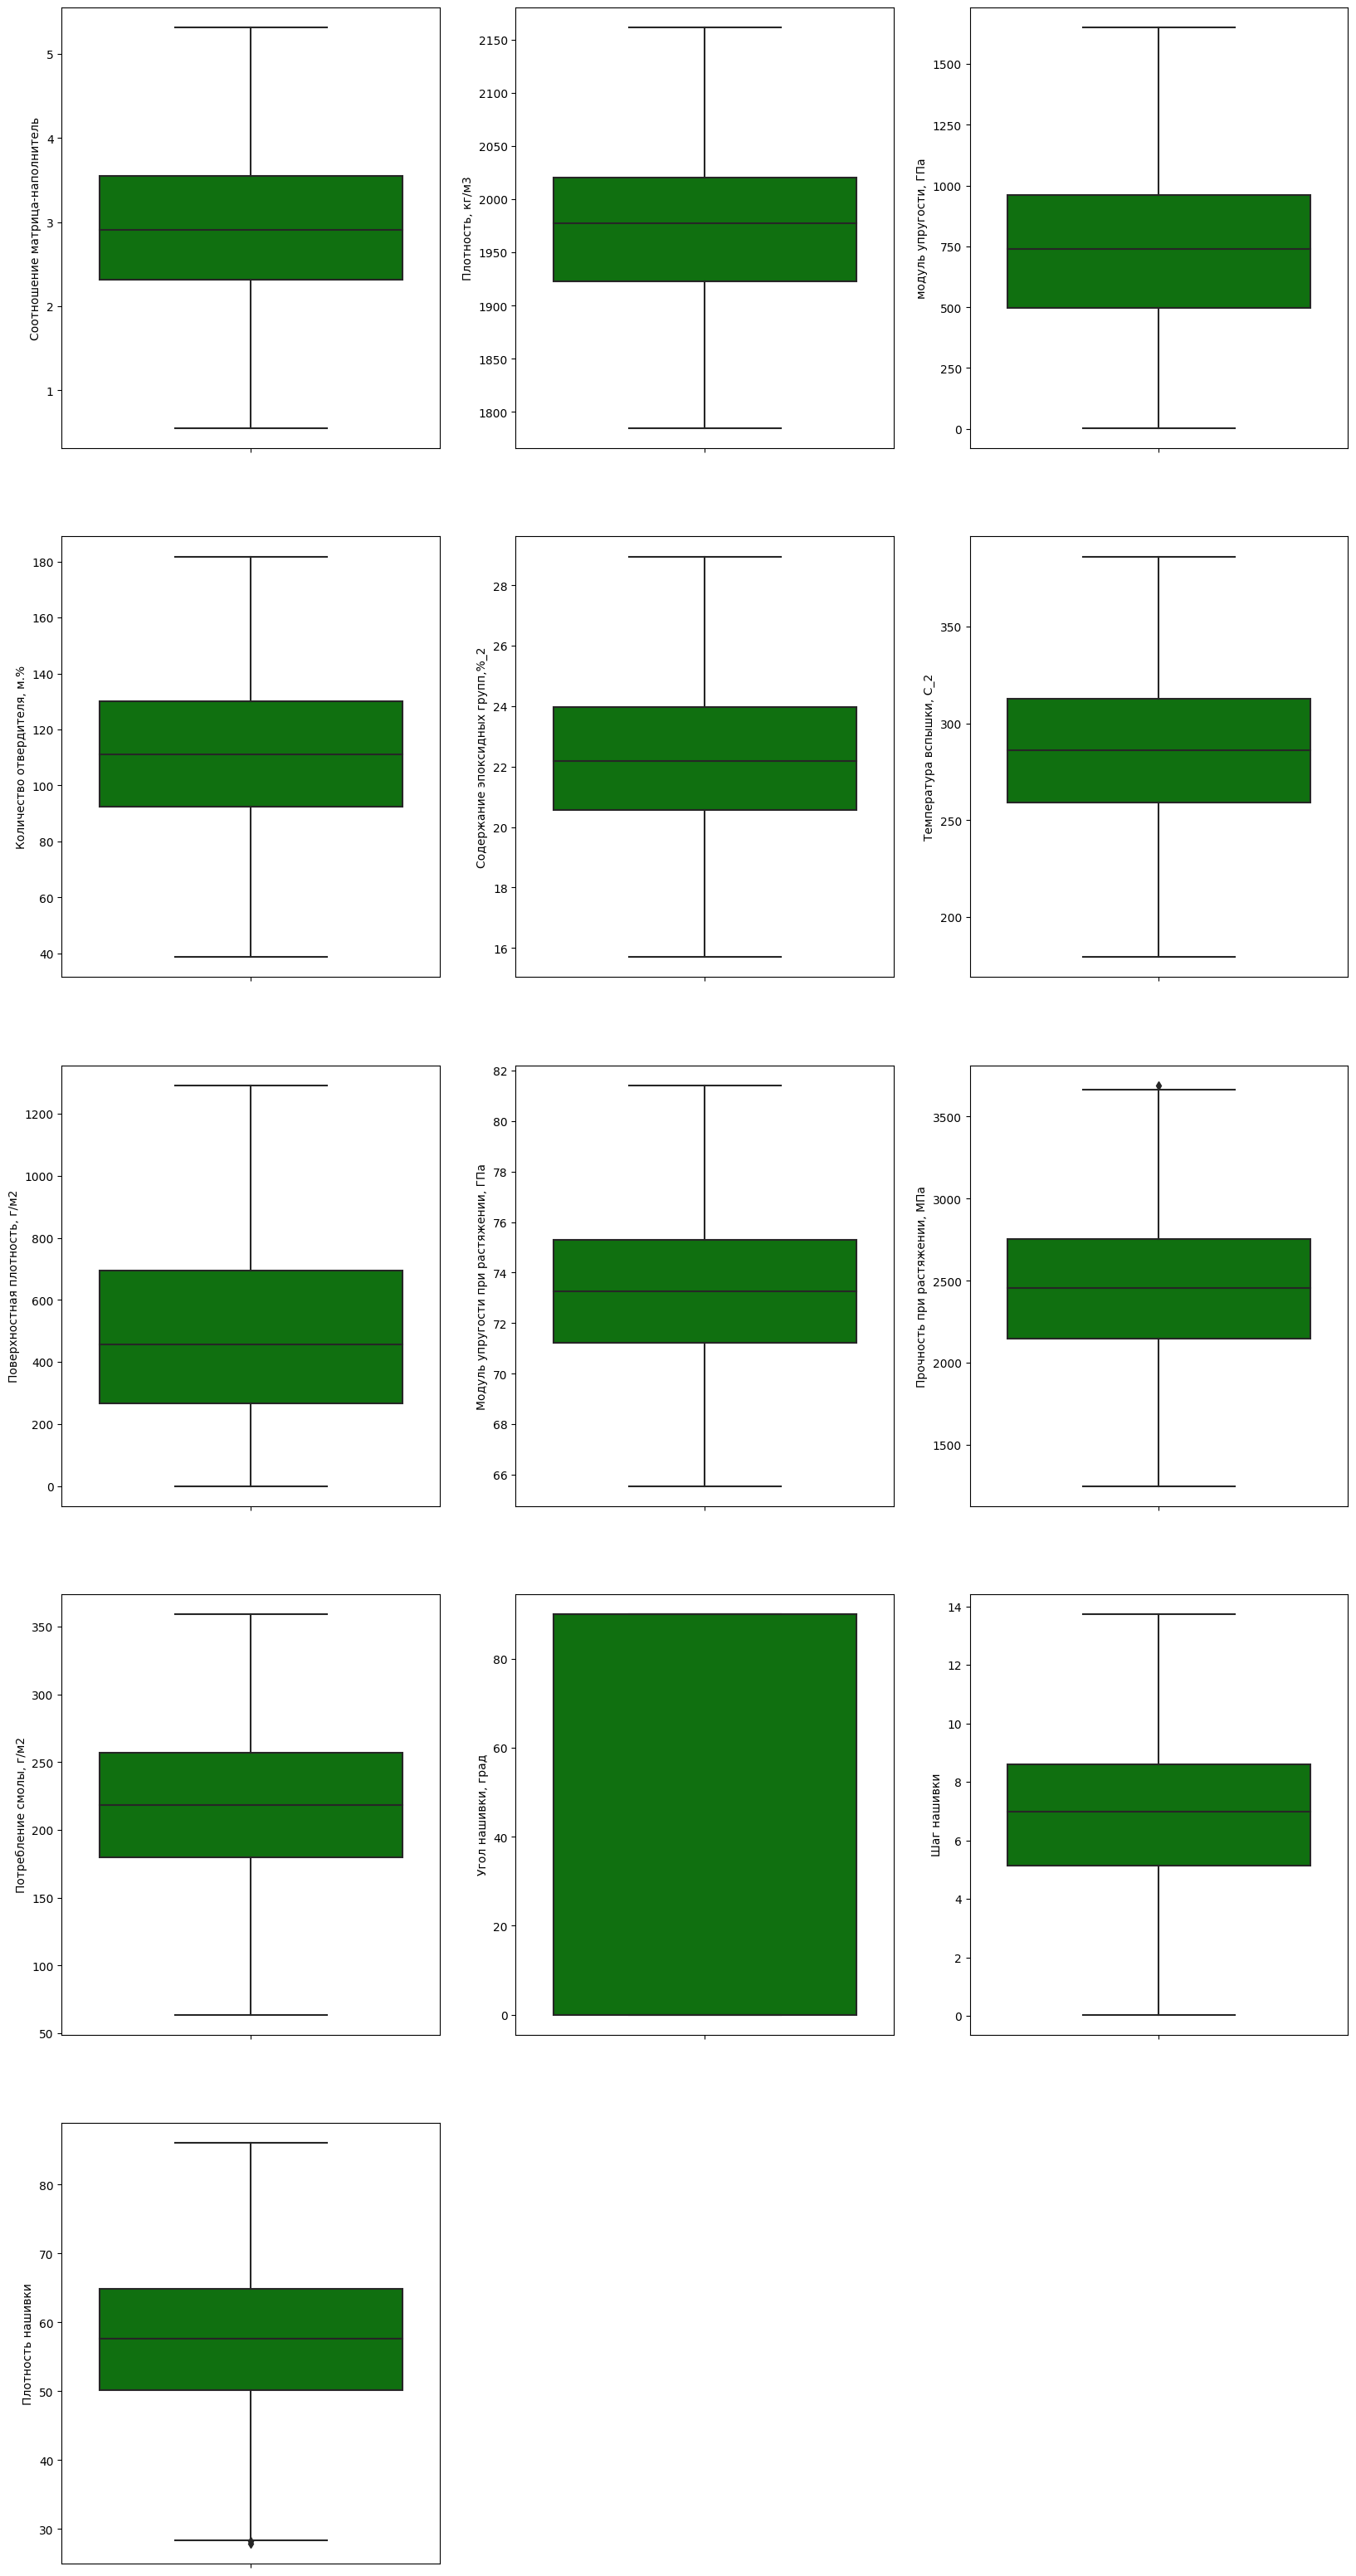

In [16]:
# оценка наличия выбросов и аномальных значений, а также их количества в столбцах очищенного 1 раз датасета
plt.figure(figsize=(20, 40))
i=1 
for name in df_clean.columns:
    plt.subplot(5,3,i)
    sns.boxplot(y=df_clean[name], color = 'g')
    outlier = boxplot_stats(df_clean[name])
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    i +=1

In [17]:
# Осталось небольшое количество выбросов, сделаем очистку 2 раз
print(df_clean.shape)
for name in df_clean.columns:
    outlier = boxplot_stats(df_clean[name])
    High = outlier[0]['whishi']
    Low =  outlier[0]['whislo']
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    df_clean = df_clean[~((df_clean[name] < Low) | (df_clean[name] > High))]
print(df_clean.shape) 

(932, 13)
Количество выбросов в столбце  Соотношение матрица-наполнитель :  0
Количество выбросов в столбце  Плотность, кг/м3 :  0
Количество выбросов в столбце  модуль упругости, ГПа :  0
Количество выбросов в столбце  Количество отвердителя, м.% :  0
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  0
Количество выбросов в столбце  Температура вспышки, С_2 :  0
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  0
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  0
Количество выбросов в столбце  Прочность при растяжении, МПа :  1
Количество выбросов в столбце  Потребление смолы, г/м2 :  1
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  0
Количество выбросов в столбце  Плотность нашивки :  3
(927, 13)


Количество выбросов в столбце  Соотношение матрица-наполнитель :  0
Количество выбросов в столбце  Плотность, кг/м3 :  0
Количество выбросов в столбце  модуль упругости, ГПа :  1
Количество выбросов в столбце  Количество отвердителя, м.% :  0
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  0
Количество выбросов в столбце  Температура вспышки, С_2 :  0
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  0
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  0
Количество выбросов в столбце  Прочность при растяжении, МПа :  2
Количество выбросов в столбце  Потребление смолы, г/м2 :  0
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  0
Количество выбросов в столбце  Плотность нашивки :  0


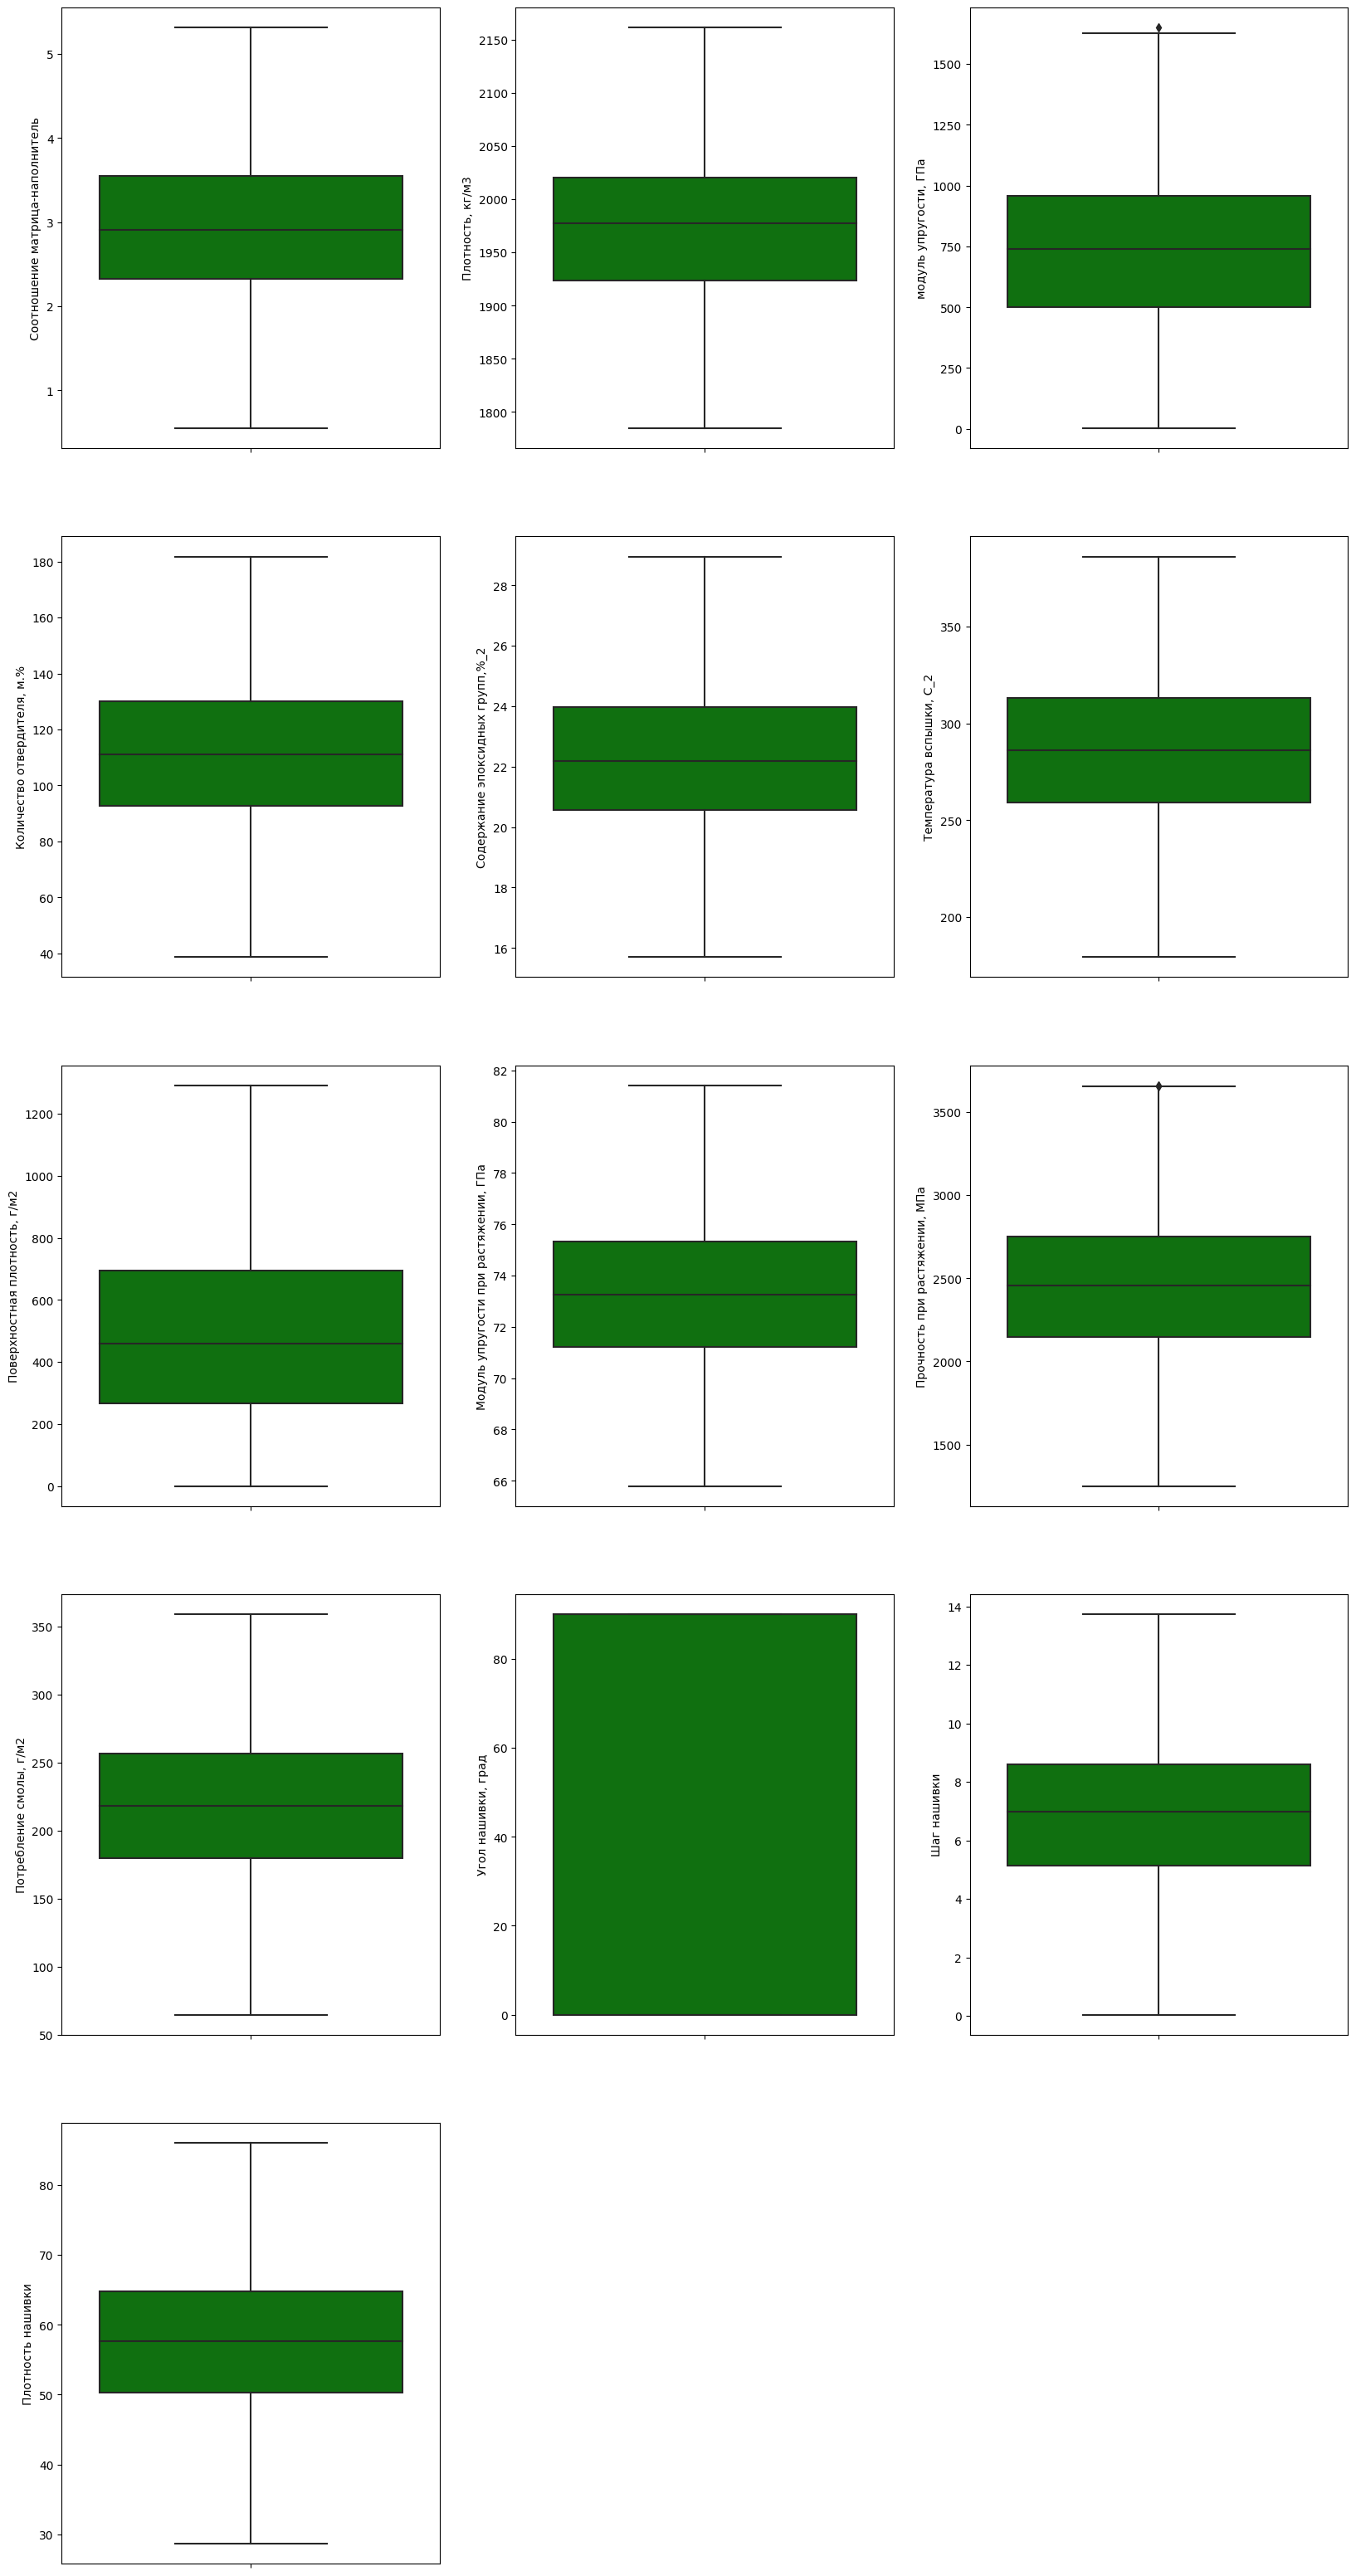

In [18]:
# оценка наличия выбросов и аномальных значений, а также их количества в столбцах очищенного 2 раза датасета
plt.figure(figsize=(20, 40))
i=1 
for name in df_clean.columns:
    plt.subplot(5,3,i)
    sns.boxplot(y=df_clean[name], color = 'g')
    outlier = boxplot_stats(df_clean[name])
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    i +=1

In [19]:
# Осталось небольшое количество выбросов, сделаем очистку 3 раз
print(df_clean.shape)
for name in df_clean.columns:
    outlier = boxplot_stats(df_clean[name])
    High = outlier[0]['whishi']
    Low =  outlier[0]['whislo']
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    df_clean = df_clean[~((df_clean[name] < Low) | (df_clean[name] > High))]
print(df_clean.shape) 

(927, 13)
Количество выбросов в столбце  Соотношение матрица-наполнитель :  0
Количество выбросов в столбце  Плотность, кг/м3 :  0
Количество выбросов в столбце  модуль упругости, ГПа :  1
Количество выбросов в столбце  Количество отвердителя, м.% :  0
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  0
Количество выбросов в столбце  Температура вспышки, С_2 :  0
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  0
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  1
Количество выбросов в столбце  Прочность при растяжении, МПа :  3
Количество выбросов в столбце  Потребление смолы, г/м2 :  1
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  0
Количество выбросов в столбце  Плотность нашивки :  0
(921, 13)


Количество выбросов в столбце  Соотношение матрица-наполнитель :  0
Количество выбросов в столбце  Плотность, кг/м3 :  0
Количество выбросов в столбце  модуль упругости, ГПа :  0
Количество выбросов в столбце  Количество отвердителя, м.% :  0
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  0
Количество выбросов в столбце  Температура вспышки, С_2 :  0
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  0
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  0
Количество выбросов в столбце  Прочность при растяжении, МПа :  0
Количество выбросов в столбце  Потребление смолы, г/м2 :  0
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  0
Количество выбросов в столбце  Плотность нашивки :  0


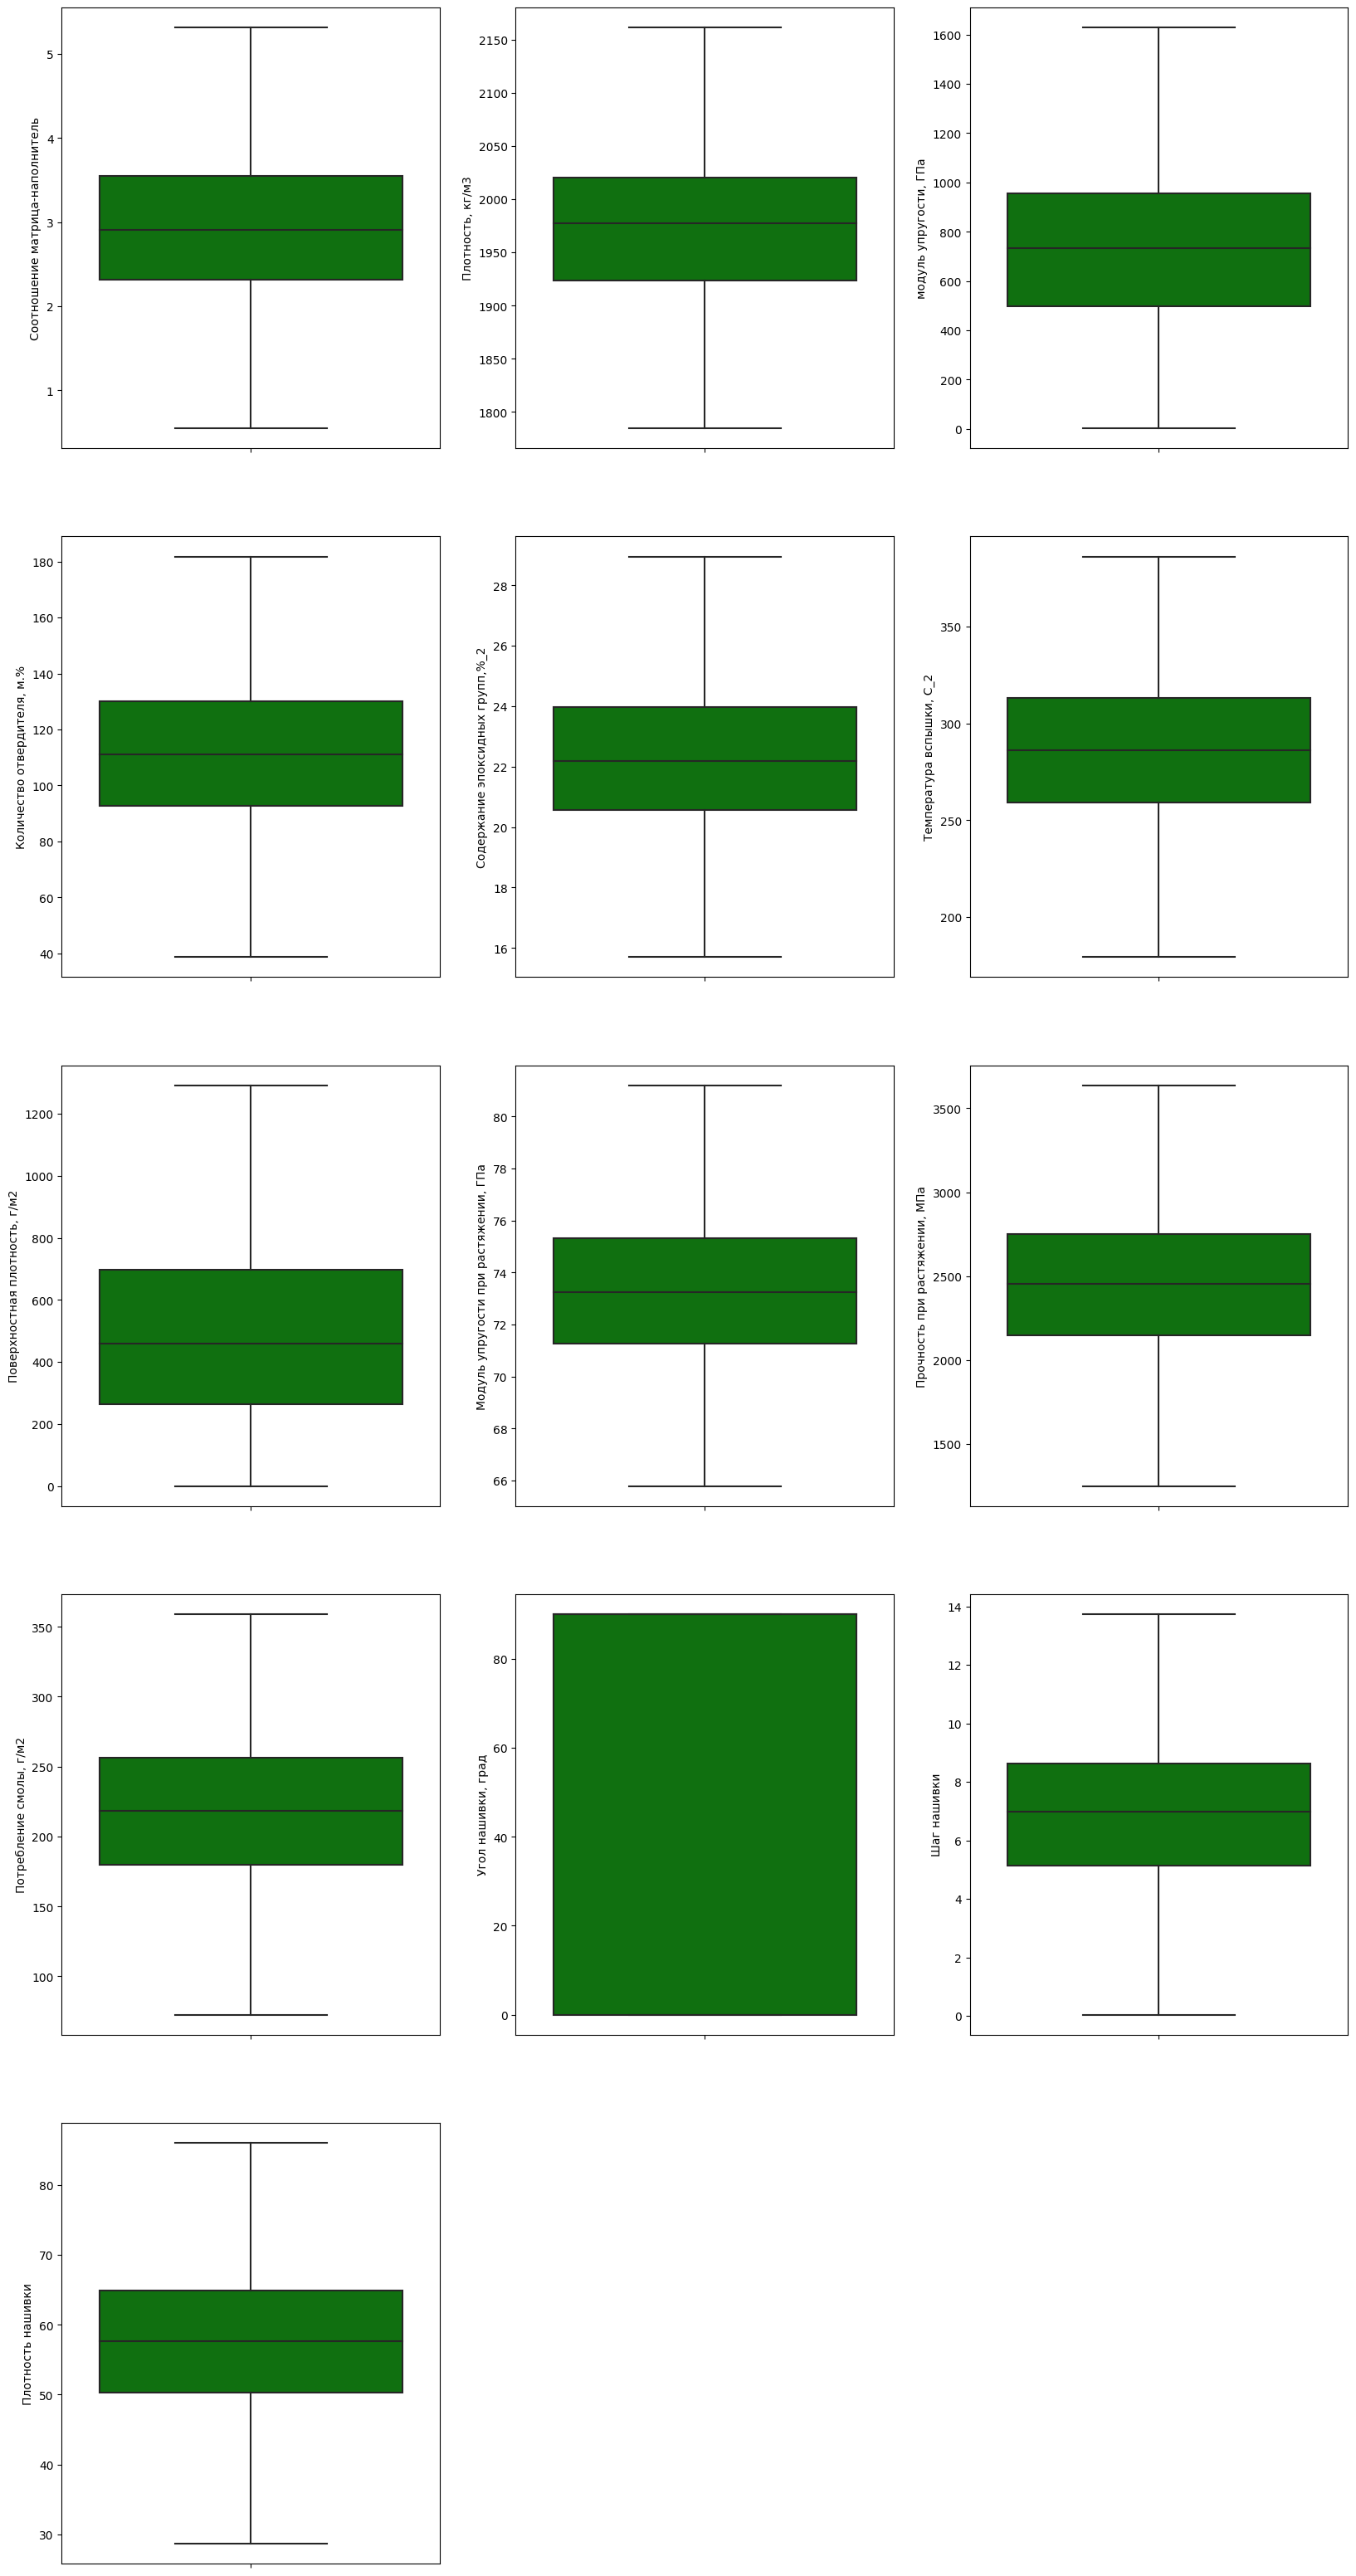

In [20]:
# оценка наличия, количества выбросов в очищенном 3 раза датасете
plt.figure(figsize=(20, 40))
i=1 
for name in df_clean.columns:
    plt.subplot(5,3,i)
    sns.boxplot(y=df_clean[name], color = 'g')
    outlier = boxplot_stats(df_clean[name])
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    i +=1

In [21]:
# Осталось небольшое количество выбросов, сделаем очистку 4 раз
print(df_clean.shape)
for name in df_clean.columns:
    outlier = boxplot_stats(df_clean[name])
    High = outlier[0]['whishi']
    Low =  outlier[0]['whislo']
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    df_clean = df_clean[~((df_clean[name] < Low) | (df_clean[name] > High))]
print(df_clean.shape) 

(921, 13)
Количество выбросов в столбце  Соотношение матрица-наполнитель :  0
Количество выбросов в столбце  Плотность, кг/м3 :  0
Количество выбросов в столбце  модуль упругости, ГПа :  0
Количество выбросов в столбце  Количество отвердителя, м.% :  0
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  0
Количество выбросов в столбце  Температура вспышки, С_2 :  0
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  0
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  0
Количество выбросов в столбце  Прочность при растяжении, МПа :  0
Количество выбросов в столбце  Потребление смолы, г/м2 :  0
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  0
Количество выбросов в столбце  Плотность нашивки :  0
(921, 13)


Все выбросы удалены, строим итоговую диаграму Boxplot очищенного датасета

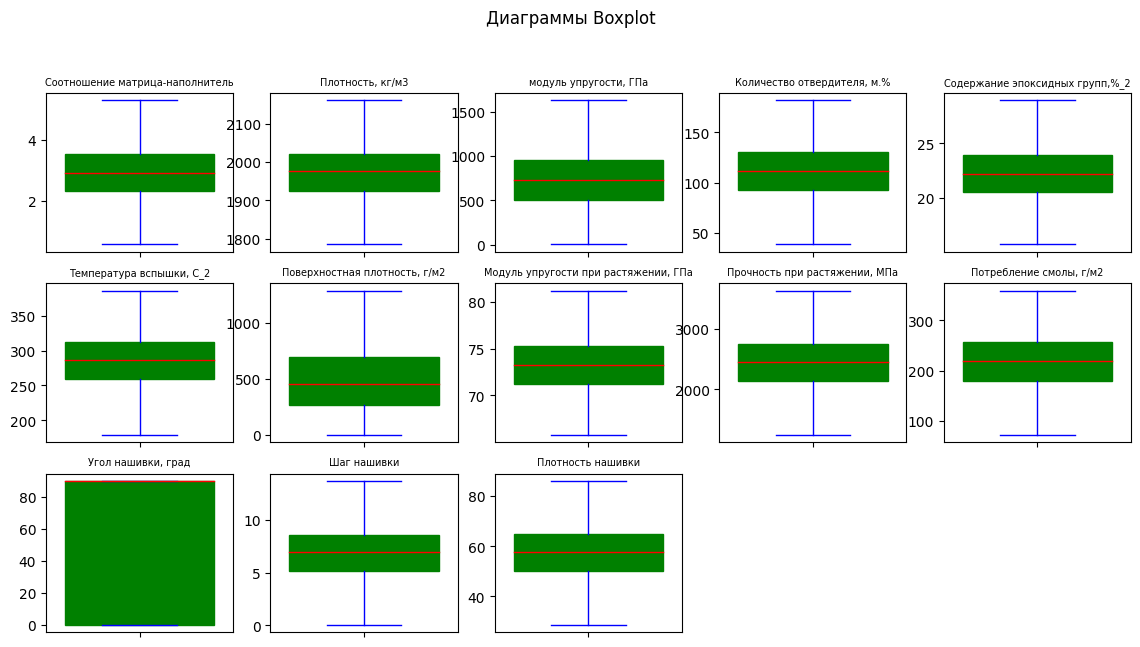

In [22]:
a = 3 # количество строк
b = 5 # количество столцбцов
c = 1 # инициализация plot counter
plt.figure(figsize = (14,7))
plt.suptitle('Диаграммы Boxplot', y = 1 ,
 fontsize = 12)
for col in df_clean.columns:
    plt.subplot(a, b, c)
    sns.boxplot(data = df_clean, y = df_clean[col], fliersize = 3, linewidth = 1, boxprops = dict(facecolor = 'y', color = 'g'), medianprops = dict(color = 'red'), whiskerprops = dict(color = "b"), capprops = dict(color="blue"), flierprops = dict(color = "y", markeredgecolor = "black"))
    plt.ylabel(None)
    plt.title(col, size = 7)
#plt.show()
    c += 1

In [23]:
# y_clear = X_clear[['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']]
# X_clear = X_clear.drop(columns=['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)

Просмотрим информацию о датасете после удаления выбросов.

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       921 non-null    float64
 1   Плотность, кг/м3                      921 non-null    float64
 2   модуль упругости, ГПа                 921 non-null    float64
 3   Количество отвердителя, м.%           921 non-null    float64
 4   Содержание эпоксидных групп,%_2       921 non-null    float64
 5   Температура вспышки, С_2              921 non-null    float64
 6   Поверхностная плотность, г/м2         921 non-null    float64
 7   Модуль упругости при растяжении, ГПа  921 non-null    float64
 8   Прочность при растяжении, МПа         921 non-null    float64
 9   Потребление смолы, г/м2               921 non-null    float64
 10  Угол нашивки, град                    921 non-null    int64  
 11  Шаг нашивки       

Построим гистограммы распределения каждой из переменных без нормализации

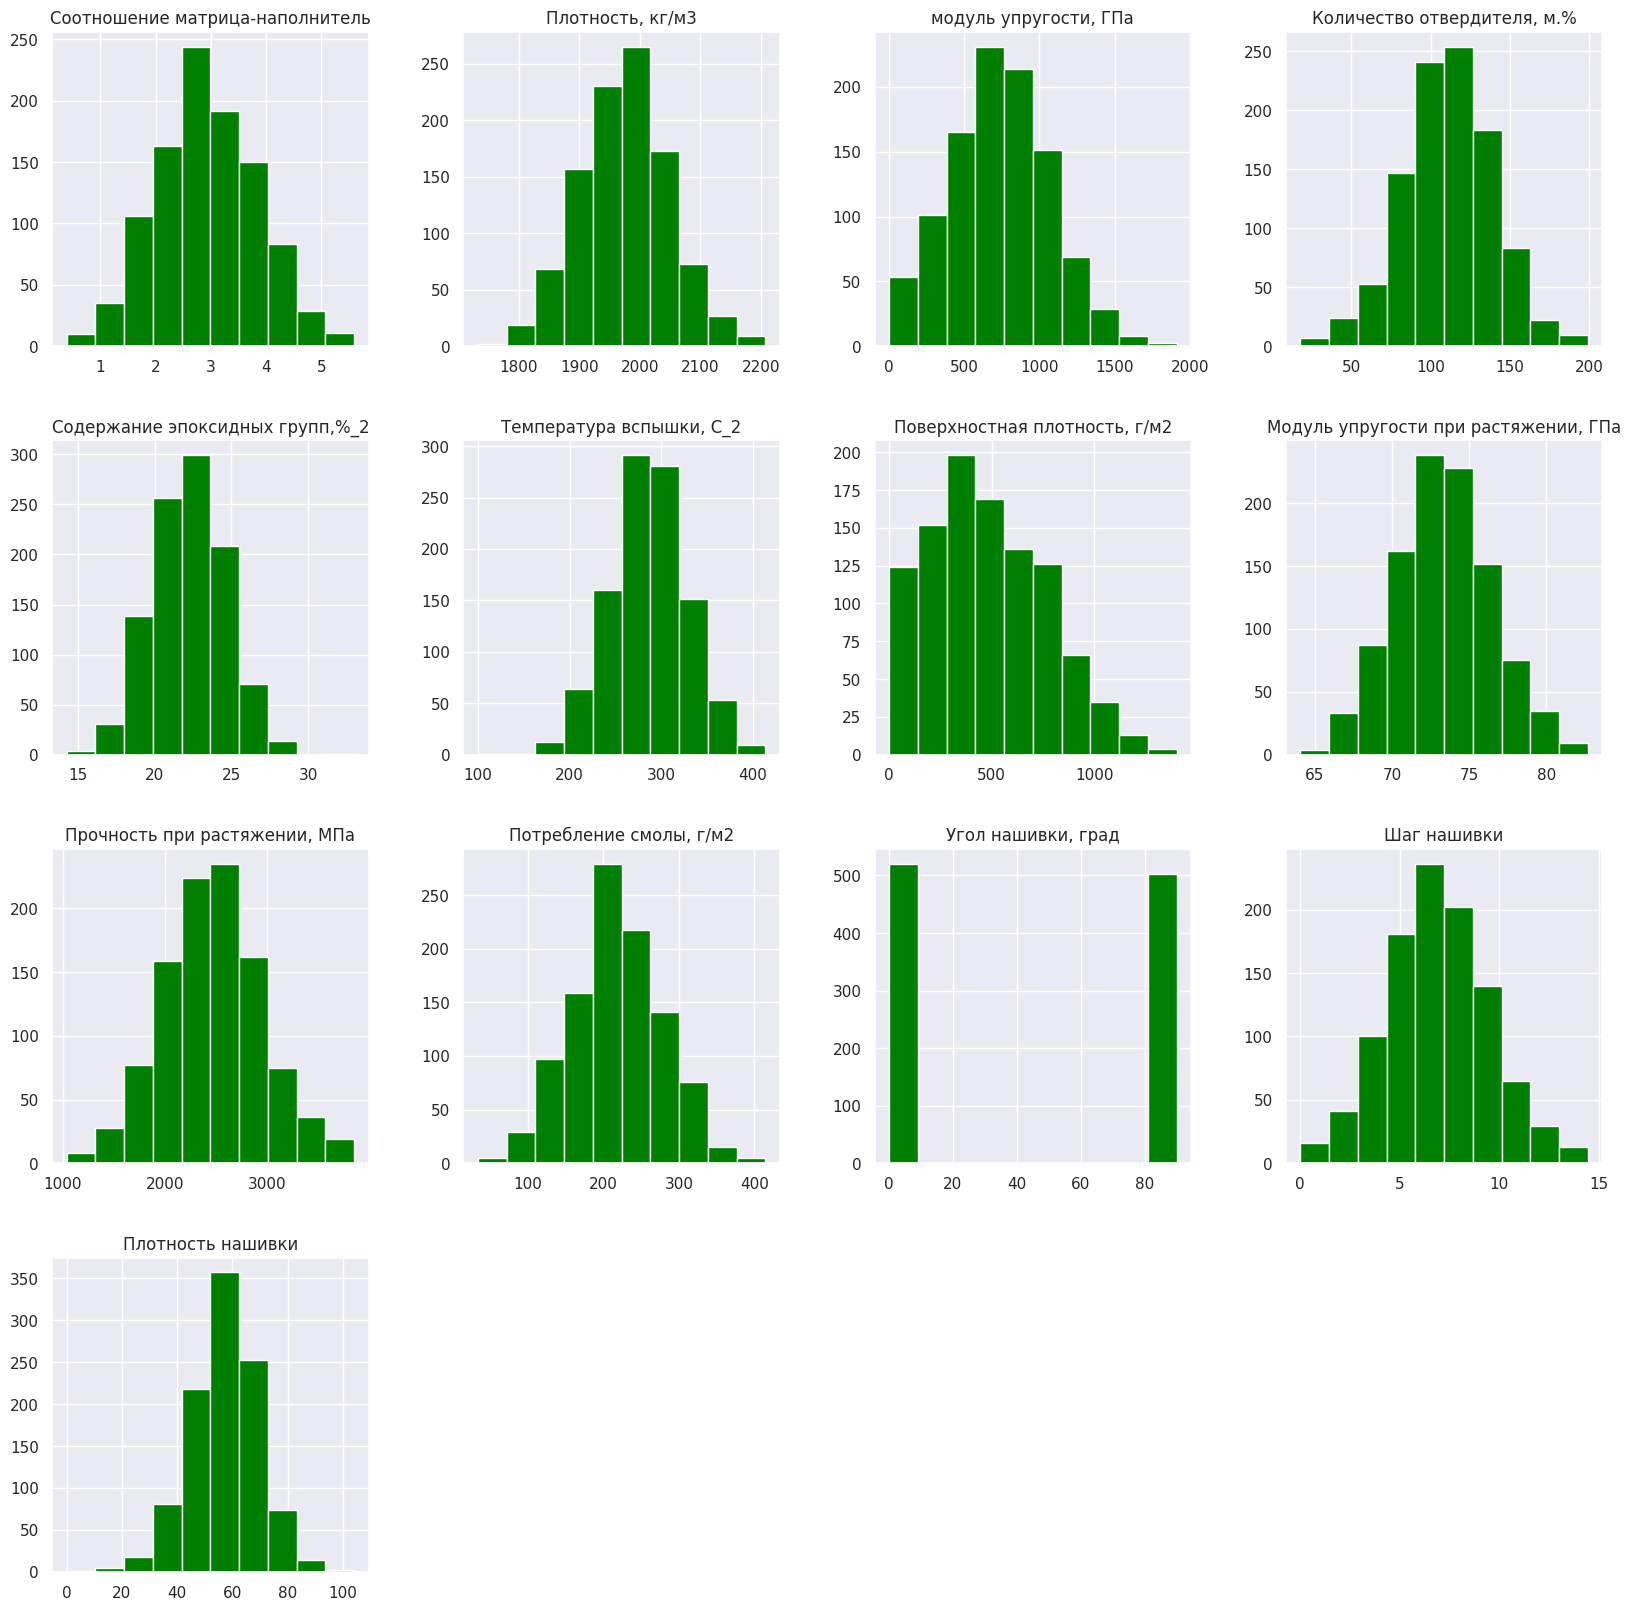

In [35]:
df.hist(figsize = (20,20), color = "green")
plt.show()

In [26]:
sns.set_style('darkgrid')
sns.pairplot(df, hue = 'Угол нашивки, град', markers = ["o", "s"], diag_kind = 'auto', palette = 'Set2', kind='scatter', plot_kws={'alpha':0.5})

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

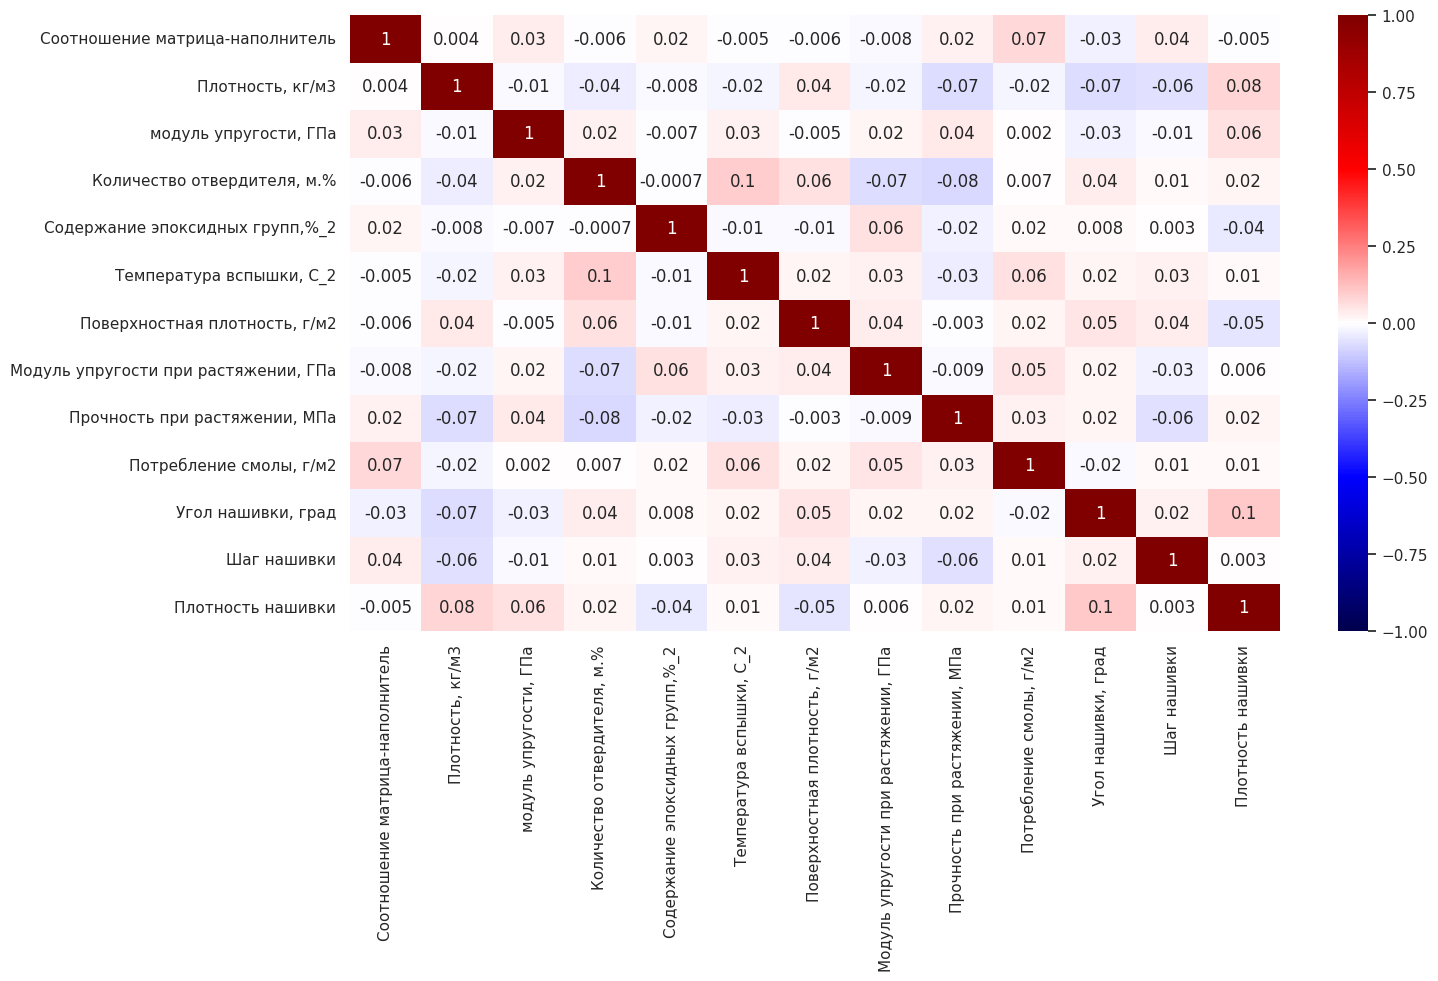

In [27]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap = 'seismic')

Сохраняем в файл очищенный датасет

In [28]:
df_clean.to_csv('\df_clean.csv')

In [29]:
df_clean.corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.008011,0.051680,0.001350,0.021984,-0.010586,0.011885,-0.024342,0.019282,0.076976,-0.032189,0.039927,0.047829
"Плотность, кг/м3",0.008011,1.000000,-0.001877,-0.048876,0.004527,-0.020854,0.062549,-0.015178,-0.081074,-0.010457,-0.052423,-0.048716,0.086880
"модуль упругости, ГПа",0.051680,-0.001877,1.000000,0.044662,-0.001502,0.038223,-0.006471,0.020673,0.028953,0.007202,-0.030660,0.010158,0.079398
"Количество отвердителя, м.%",0.001350,-0.048876,0.044662,1.000000,0.011438,0.070554,0.038613,-0.057133,-0.065625,-0.014665,0.033993,-0.017382,0.007901
"Содержание эпоксидных групп,%_2",0.021984,0.004527,-0.001502,0.011438,1.000000,-0.025268,-0.015742,0.053957,-0.013353,0.010712,0.034618,0.007563,-0.034439
"Температура вспышки, С_2",-0.010586,-0.020854,0.038223,0.070554,-0.025268,1.000000,0.019137,0.013641,-0.015353,0.049258,0.001606,0.034479,-0.015508
"Поверхностная плотность, г/м2",0.011885,0.062549,-0.006471,0.038613,-0.015742,0.019137,1.000000,0.032338,-0.022855,-0.010190,0.051501,0.037156,-0.036178
"Модуль упругости при растяжении, ГПа",-0.024342,-0.015178,0.020673,-0.057133,0.053957,0.013641,0.032338,1.000000,-0.000356,0.052833,0.031145,-0.010119,0.011992
"Прочность при растяжении, МПа",0.019282,-0.081074,0.028953,-0.065625,-0.013353,-0.015353,-0.022855,-0.000356,1.000000,0.012810,0.019146,-0.052060,0.018238
"Потребление смолы, г/м2",0.076976,-0.010457,0.007202,-0.014665,0.010712,0.049258,-0.010190,0.052833,0.012810,1.000000,0.001991,0.009792,0.009011


Посмотрим на средние и медианные знчения датасета после выбросов.

In [30]:
df_clean.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,2.927987,1974.076438,735.845364,111.139456,22.200385,286.210649,482.917197,73.305807,2460.196046,217.961148,46.026059,6.931668,57.570720
std,0.895958,71.067625,327.678809,26.767566,2.395220,39.431984,280.197532,3.026672,452.101798,57.107510,45.012744,2.515536,11.125702
min,0.547391,1784.482245,2.436909,38.668500,15.695894,179.374391,0.603740,65.793845,1250.392802,72.530873,0.000000,0.037639,28.661632
25%,2.319322,1923.255135,498.519344,92.834720,20.555344,259.224491,264.538975,71.252628,2147.576085,179.858423,0.000000,5.140035,50.273632
50%,2.908787,1977.302956,734.763985,111.166301,22.177332,286.302097,458.556445,73.253725,2455.555556,218.448971,90.000000,6.968698,57.603262
75%,3.550038,2020.108384,956.906660,130.163998,23.957502,313.023467,695.845999,75.310287,2751.228051,256.283235,90.000000,8.613054,64.854936
max,5.314144,2161.565216,1628.000000,181.828448,28.955094,386.067992,1291.340115,81.203147,3636.892992,359.052220,90.000000,13.732404,86.012427


Сделаем стандартизированный датасет

In [31]:
df_std = df_clean.copy()

In [32]:
# стандартизация  данных
scaler_std = StandardScaler()
scaler_std.fit(df_std)
df_std = pd.DataFrame (data =scaler_std.transform(df_std), columns=df_std.columns)

In [33]:
df_std.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,-1.195844,0.787334,0.008829,-2.285328,0.647313,-0.040478,-0.974546,-1.092818,1.194636,0.035721,-1.023067,-1.166058,0.218467
1,-1.195844,0.787334,0.008829,0.667608,-0.397000,0.349890,-0.974546,-1.092818,1.194636,0.035721,-1.023067,-0.768312,-0.950633
2,-0.174943,0.787334,0.052380,0.026933,0.028185,-0.040478,-0.974546,-1.092818,1.194636,0.035721,-1.023067,-0.768312,-0.051325
3,-0.178754,0.364971,0.037113,0.026933,0.028185,-0.040478,-0.974546,-1.092818,1.194636,0.035721,-1.023067,-0.768312,0.218467
4,-0.400199,-0.902116,0.217265,0.026933,0.028185,-0.040478,-0.974546,-1.092818,1.194636,0.035721,-1.023067,-0.768312,1.117775


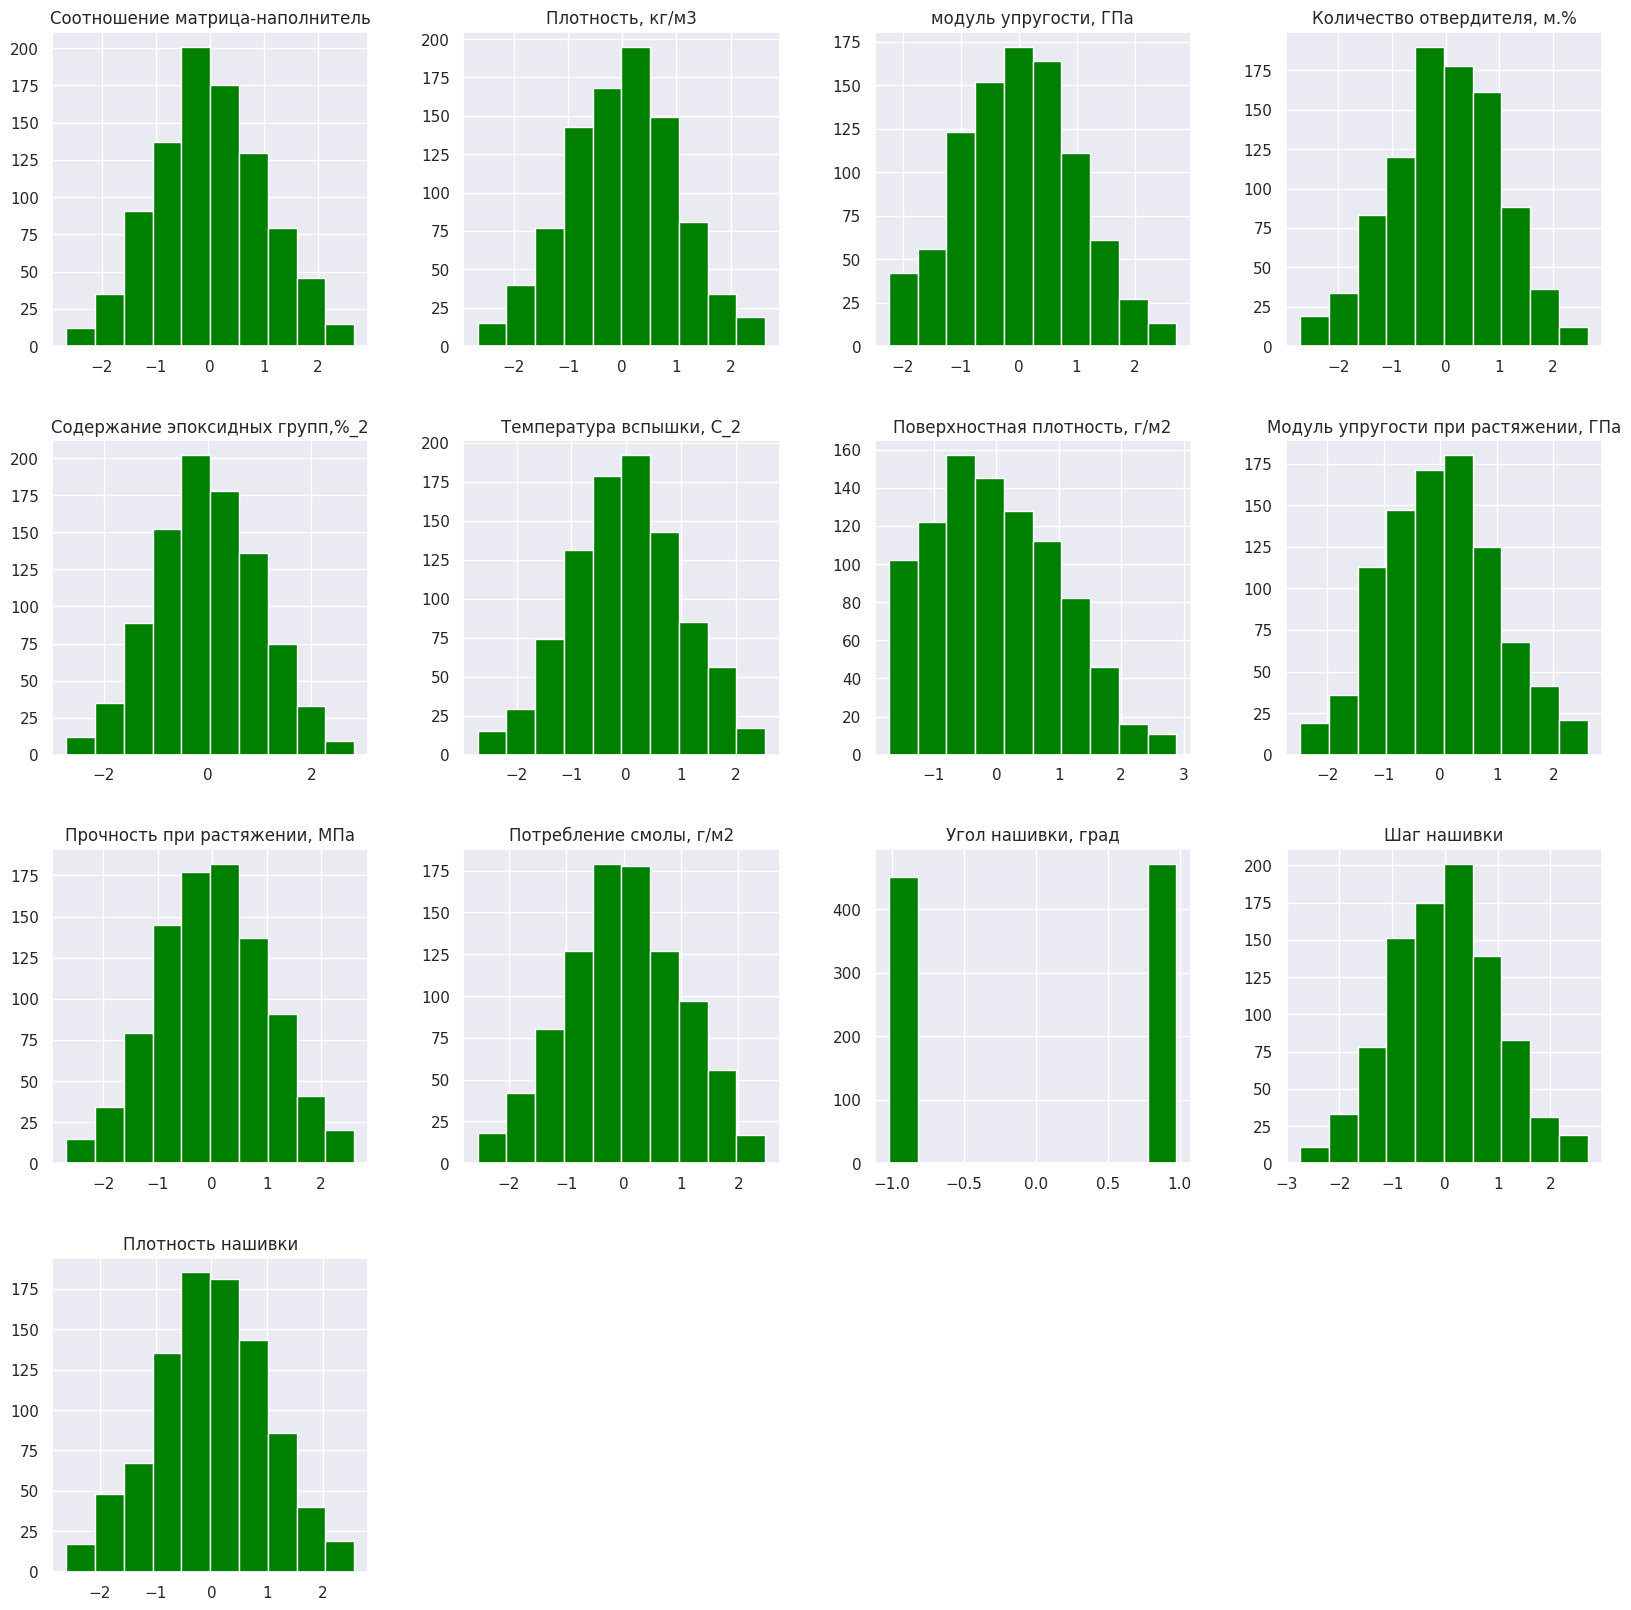

In [36]:
df_std.hist(figsize = (20,20), color = "green")
plt.show()

Сделаем нормализованный датасет (так как некоторые методы плохо работают с отрицательными значениями


In [37]:
df_norm = df_clean.copy()

In [38]:
# нормализация очищенных данных
scaler_norm = MinMaxScaler()
scaler_norm.fit(df_norm)
df_norm = pd.DataFrame (data =scaler_norm.transform(df_norm), columns=df_norm.columns)

In [39]:
df_norm.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.274768,0.651097,0.452951,0.079153,0.607435,0.509164,0.16223,0.272962,0.733127,0.514688,0.0,0.289334,0.546433
1,0.274768,0.651097,0.452951,0.630983,0.418887,0.583596,0.16223,0.272962,0.733127,0.514688,0.0,0.362355,0.319758
2,0.466552,0.651097,0.461725,0.511257,0.495653,0.509164,0.16223,0.272962,0.733127,0.514688,0.0,0.362355,0.494123
3,0.465836,0.571539,0.458649,0.511257,0.495653,0.509164,0.16223,0.272962,0.733127,0.514688,0.0,0.362355,0.546433
4,0.424236,0.332865,0.494944,0.511257,0.495653,0.509164,0.16223,0.272962,0.733127,0.514688,0.0,0.362355,0.720799


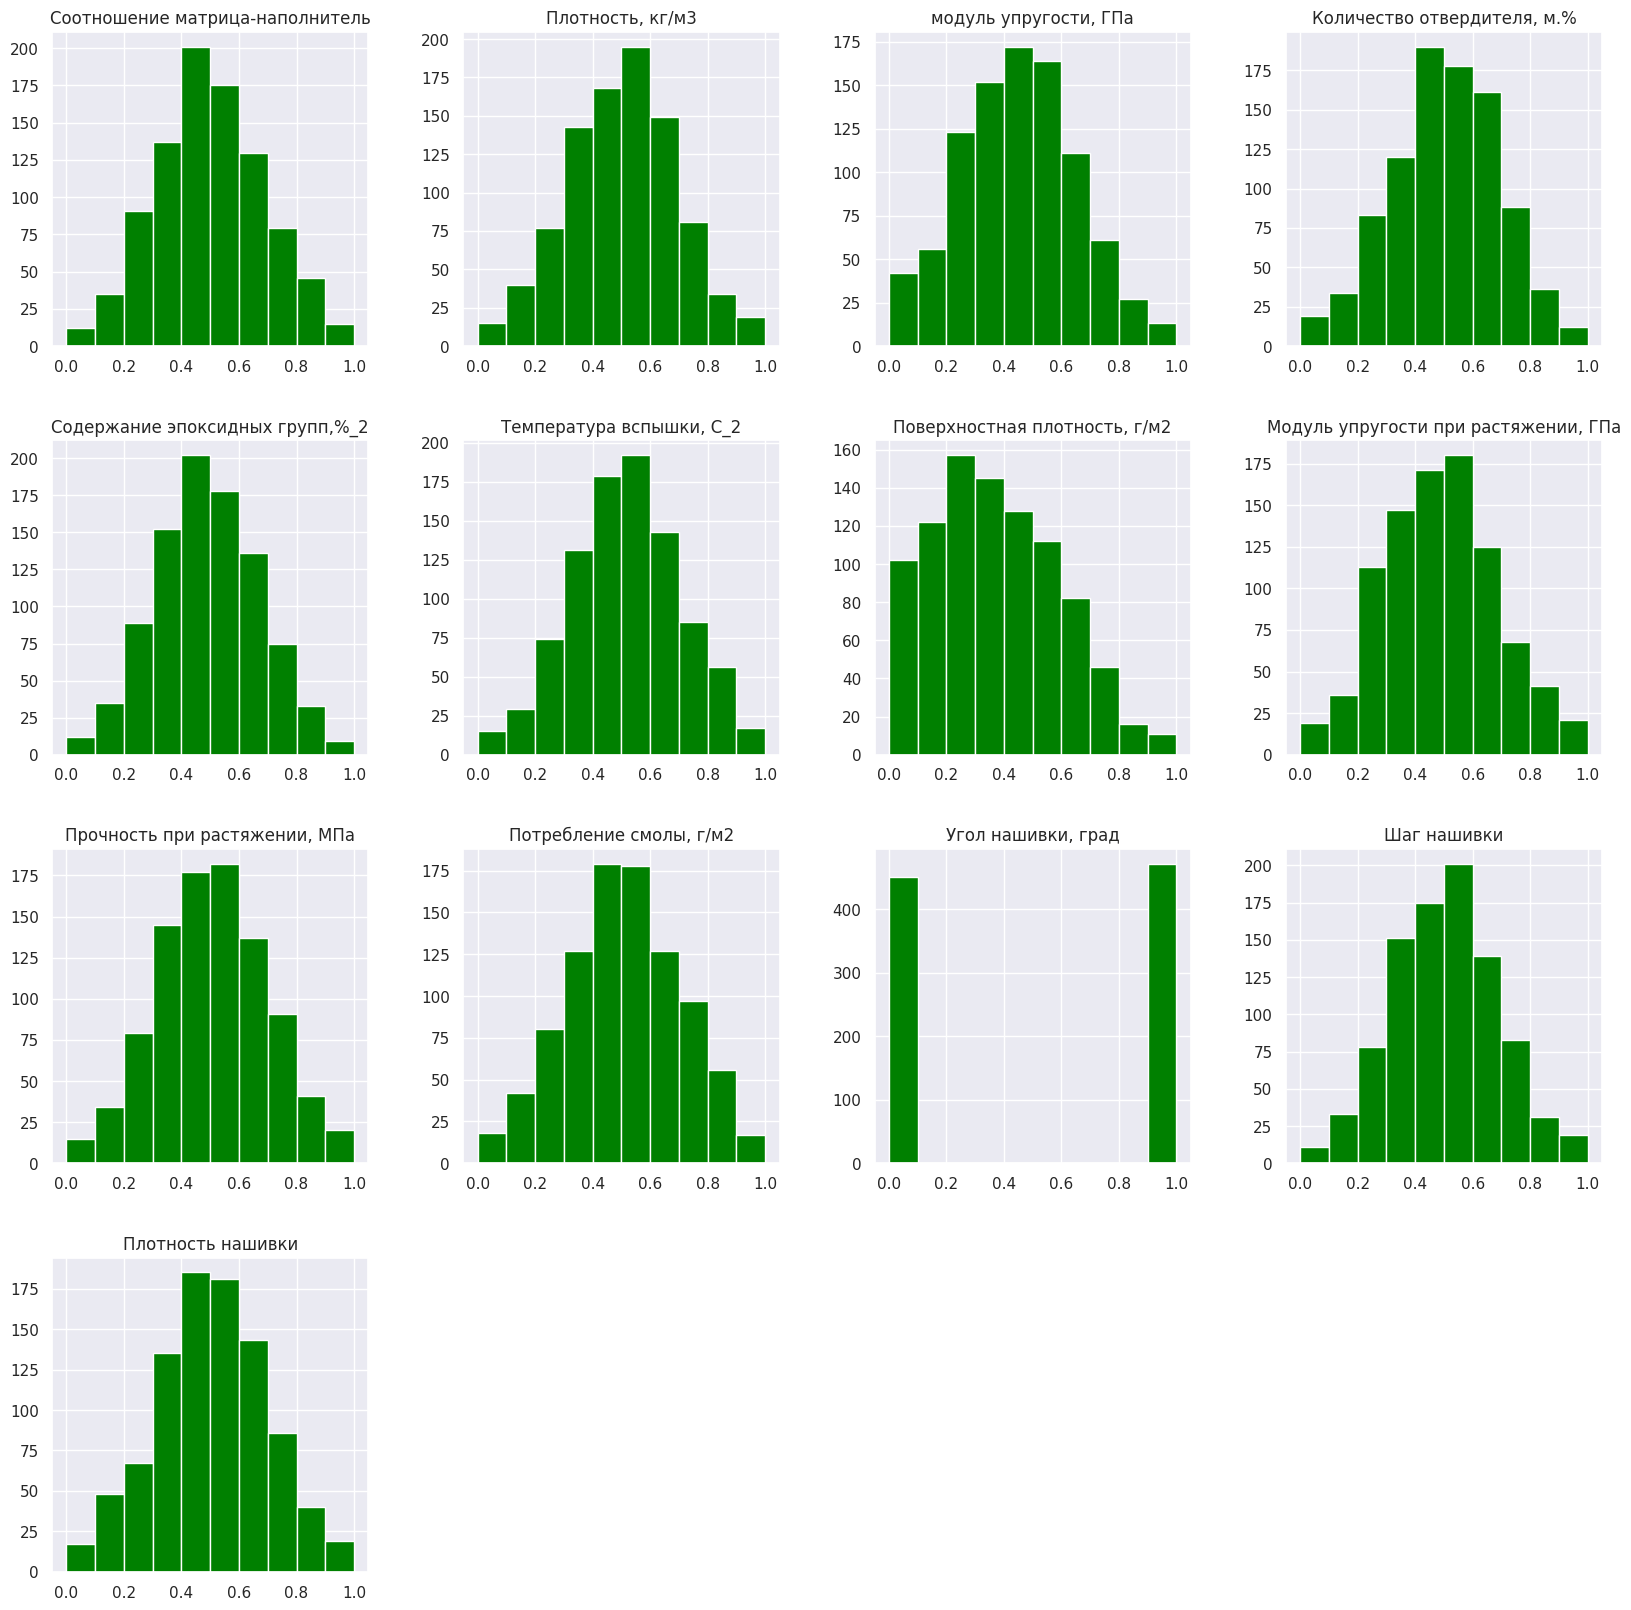

In [41]:
df_norm.hist(figsize = (20,20), color = "green")
plt.show()

Проверяем обратный переход от нормализованного и стандартизированного датасетов к исходному

In [42]:
col = df_norm.columns
result_reverse = scaler_norm.inverse_transform(df_norm)
initial_data = pd.DataFrame(result_reverse, columns = col)
initial_data.head(10)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,70.0
5,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.0,1800.0,120.0,0.0,7.0,47.0
6,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.0,1800.0,120.0,0.0,7.0,57.0
7,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0.0,7.0,60.0
8,2.919678,2160.0,933.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0.0,7.0,70.0
9,2.877358,1990.0,1628.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,0.0,9.0,47.0


In [43]:
col = df_std.columns
result_reverse1 = scaler_std.inverse_transform(df_std)
initial_data1 = pd.DataFrame(result_reverse1, columns = col)
initial_data1.head(10)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,-7.105427e-15,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,-7.105427e-15,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,-7.105427e-15,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,-7.105427e-15,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,-7.105427e-15,5.0,70.0
5,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.0,1800.0,120.0,-7.105427e-15,7.0,47.0
6,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.0,1800.0,120.0,-7.105427e-15,7.0,57.0
7,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,-7.105427e-15,7.0,60.0
8,2.919678,2160.0,933.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,-7.105427e-15,7.0,70.0
9,2.877358,1990.0,1628.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0,-7.105427e-15,9.0,47.0


Запишем нормализованный и стандартизированный датасет в файлы

In [44]:
df_std.to_csv('\df_std.csv')

In [45]:
df_norm.to_csv('\df_norm.csv')

**Подбор модели**



В этом разделе необходимо:

    30% данных оставить на тестирование модели, на остальных происходит обучение моделей.
    Провести предобработку данных (нормализация и т.д.).
    При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
    Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении.
    Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.


В качестве метрики для оценки моделей возьмём среднюю абсолютную ошибку (mae) и коэффициент детерминации (R2)

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge, ARDRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU 
%matplotlib inline 
sns.set(style="ticks")

In [47]:
# хранение оценок моделей
# y1 - Модуль упругости при растяжении, ГПа
# y2 - Прочность при растяжении, МПа

MAE_y1=[]
MAE_y2=[]
R2_y1=[]
R2_y2=[]

In [48]:
# Загрузка данных для обучения
df = pd.read_csv('/content/\df_clean.csv')
df.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [49]:
y = df[['Прочность при растяжении, МПа','Модуль упругости при растяжении, ГПа']]
y1 = df[['Прочность при растяжении, МПа']]
y2 = df[['Модуль упругости при растяжении, ГПа']]
y.head()

,"Прочность при растяжении, МПа","Модуль упругости при растяжении, ГПа"
0,3000.0,70.0
1,3000.0,70.0
2,3000.0,70.0
3,3000.0,70.0
4,3000.0,70.0


In [50]:
X = df.drop(columns=['Unnamed: 0', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
X.T

,0,1,2,3,4,5,6,7,8,9,...,911,912,913,914,915,916,917,918,919,920
Соотношение матрица-наполнитель,1.857143,1.857143,2.771331,2.767918,2.569620,2.561475,3.557018,3.532338,2.919678,2.877358,...,2.310394,1.646235,2.806563,3.745862,2.758727,2.271346,3.444022,3.280604,3.705351,3.808020
"Плотность, кг/м3",2030.000000,2030.000000,2030.000000,2000.000000,1910.000000,1900.000000,1930.000000,2100.000000,2160.000000,1990.000000,...,1931.146887,2014.772547,1872.864660,1914.629424,2000.506141,1952.087902,2050.089171,1972.372865,2066.799773,1890.413468
"модуль упругости, ГПа",738.736842,738.736842,753.000000,748.000000,807.000000,535.000000,889.000000,1421.000000,933.000000,1628.000000,...,554.010341,841.064806,996.018683,680.683701,934.564388,912.855545,444.732634,416.836524,741.475517,417.316232
"Количество отвердителя, м.%",50.000000,129.000000,111.860000,111.860000,111.860000,111.860000,129.000000,129.000000,129.000000,129.000000,...,96.749782,102.979906,146.199194,110.979100,143.021859,86.992183,145.981978,110.533477,141.397963,129.183416
"Содержание эпоксидных групп,%_2",23.750000,21.250000,22.267857,22.267857,22.267857,22.267857,21.250000,21.250000,21.250000,21.250000,...,22.146487,21.073367,21.559290,25.922635,21.379518,20.123249,19.599769,23.957502,19.246945,27.474763
"Температура вспышки, С_2",284.615385,300.000000,284.615385,284.615385,284.615385,284.615385,300.000000,300.000000,300.000000,300.000000,...,214.827727,271.490843,313.900486,309.796388,273.852679,324.774576,254.215401,248.423047,275.779840,300.952708
"Поверхностная плотность, г/м2",210.000000,210.000000,210.000000,210.000000,210.000000,380.000000,380.000000,1010.000000,1010.000000,1010.000000,...,56.242761,615.168127,799.634090,628.364550,65.105965,209.198700,350.660830,740.142791,641.468152,758.747882
"Потребление смолы, г/м2",220.000000,220.000000,220.000000,220.000000,220.000000,120.000000,120.000000,300.000000,300.000000,300.000000,...,87.270139,232.428214,307.265172,152.184720,229.780372,125.007669,117.730099,236.606764,197.126067,194.754342
"Угол нашивки, град",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
Шаг нашивки,4.000000,5.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,9.000000,...,7.683346,5.048503,5.240448,8.057020,8.736592,9.076380,10.565614,4.161154,6.313201,6.078902


In [51]:
#разбиение данных на тестовую и тренировочную часть
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, shuffle=True)

In [52]:
# нормализация  данных
scaler_norm = MinMaxScaler()
scaler_norm.fit(X)
Xnorm = pd.DataFrame (data =scaler_norm.transform(X), columns=X.columns)
scaler_norm_y = MinMaxScaler()
scaler_norm_y.fit(y)
ynorm = pd.DataFrame (data = scaler_norm_y.transform(y), columns=y.columns)

In [53]:
#разбиение данных на тестовую и тренировочную часть
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(Xnorm,ynorm, test_size=0.3, random_state=42, shuffle=True)

In [54]:
 X_test_norm

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
319,0.418902,0.738395,0.440497,0.567588,0.403313,0.283206,0.172340,0.592926,0.0,0.430962,0.875073
377,0.665364,0.217913,0.614463,0.801616,0.529633,0.526186,0.215701,0.306343,0.0,0.503770,0.656966
538,0.419591,0.369363,0.365845,0.642552,0.463827,0.720931,0.473159,0.624456,1.0,0.462686,0.482478
296,0.351839,0.703961,0.391876,0.494342,0.337834,0.681121,0.166470,0.530558,0.0,0.661454,0.462011
531,0.344000,0.539152,0.349106,0.263748,0.577148,0.806815,0.496862,0.566806,1.0,0.591613,0.482378
...,...,...,...,...,...,...,...,...,...,...,...
420,0.290905,0.829071,0.468644,0.452294,0.541788,0.575093,0.550558,0.156250,0.0,0.576148,0.151102
133,0.287292,0.861772,0.423770,0.544413,0.446169,0.785778,0.288286,0.672341,0.0,0.291997,0.552182
490,0.598572,0.312508,0.496594,0.697279,0.466942,0.498268,0.061419,0.632369,1.0,0.420066,0.479449
558,0.268813,0.360882,0.231856,0.452929,0.173665,0.376940,0.028686,0.291147,1.0,0.308641,0.393330


In [55]:
X_test

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
319,2.544192,2062.918247,718.492638,119.924425,21.043501,237.911236,223.049480,242.416875,0,5.939560,78.847771
377,3.719015,1866.653447,1001.285793,153.427803,22.718403,288.133573,279.016949,160.304704,0,6.936649,66.339135
538,2.547478,1923.762595,597.141517,130.656142,21.845865,328.386305,611.326829,251.450925,90,6.374020,56.332103
296,2.224520,2049.933793,639.456649,109.438533,20.175300,320.157689,215.472646,224.547176,0,9.096101,55.158340
531,2.187155,1987.787140,569.930605,76.426670,23.348416,346.137893,641.922189,234.932782,90,8.139645,56.326376
...,...,...,...,...,...,...,...,...,...,...,...
420,1.934061,2097.110886,764.246548,103.418855,22.879573,298.242389,711.229254,117.299954,0,7.927846,37.327435
133,1.916843,2109.441659,691.301685,116.606570,21.611736,341.789754,372.705290,265.171039,0,4.036464,60.329680
490,3.400636,1902.323754,809.682112,138.490884,21.887169,282.363184,79.879899,253.718185,90,5.790341,56.158437
558,1.828754,1920.564566,379.333489,103.509806,17.998559,257.285562,37.629351,155.950624,90,4.264403,51.219411


In [56]:
X_train_norm.shape

(644, 11)

In [57]:
X_test_norm.shape

(277, 11)

In [58]:
y_train_norm.shape

(644, 2)

In [59]:
y_test_norm.shape

(277, 2)


Ridge regression
Гиперпараметры для поиска по сетке

In [60]:
params = [{'alpha': [20, 10, 1, 0.1, 0.01, 0.0001],
           "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]

Поиск по сетке с перекрестной проверкой

In [61]:
modelRidge = Ridge()
cv_scheme = KFold(n_splits=10, shuffle=True, random_state=1)
cv = GridSearchCV(estimator=modelRidge, param_grid=params,
                  scoring='neg_root_mean_squared_error', cv=cv_scheme, return_train_score=True, n_jobs=-1)

cv.fit(X_train_norm,y_train_norm)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [20, 10, 1, 0.1, 0.01, 0.0001],
                          'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                     'sag', 'saga']}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [62]:
print("Лучший параметр для гребневой регрессии:")
print(cv.best_params_)
print("Лучший средний балл перекрестной проверки:")
print(cv.best_score_)


Лучший параметр для гребневой регрессии:
{'alpha': 20, 'solver': 'sag'}
Лучший средний балл перекрестной проверки:
-0.1917435579039047


In [63]:
# модель линейной регрессии Ridge
alpha = cv.best_params_['alpha']
solver = cv.best_params_['solver']

modelRidge = Ridge(alpha=alpha, solver=solver)
modelRidge.fit(X_train_norm,y_train_norm)
print (modelRidge.predict(X_test_norm).shape)
y_pred =  scaler_norm_y.inverse_transform (modelRidge.predict(X_test_norm))
MAERidge_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAERidge_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Ridge_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Ridge_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAERidge_1)
print (MAERidge_2)
print (R2Ridge_1)
print (R2Ridge_2)

(277, 2)
383.54303066341294
2.455325358218636
0.0027245594923720473
0.0012353362515260535


In [64]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['Ridge_norm',MAERidge_1])
MAE_y2.append(['Ridge_norm',MAERidge_2])
R2_y1.append(['Ridge_norm',R2Ridge_1])
R2_y2.append(['Ridge_norm',R2Ridge_2])

In [65]:
print(modelRidge.coef_)

[[-0.00861825 -0.0279495   0.02677751 -0.04697183 -0.00215382 -0.0131058
  -0.00824036  0.0021191  -0.00525011 -0.01594931  0.01974002]
 [-0.00573497 -0.01273397  0.02296724 -0.02265425  0.01996491  0.02057934
   0.01207185  0.02869027  0.01760635 -0.02170303  0.00962281]]


In [66]:
lambda_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]

for lambda_val in lambda_values:
    modelRidge = Ridge(lambda_val)
    modelRidge.fit(X_train_norm,y_train_norm)
    y_pred =  scaler_norm_y.inverse_transform (modelRidge.predict(X_test_norm))
    MAERidge_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
    MAERidge_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
    R2Ridge_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
    R2Ridge_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
    print(("Lambda={} ошибка MAE={}").format(lambda_val, MAERidge_1))
    print(('Lambda={} ошибка MAE={}').format(lambda_val, MAERidge_2))
    print(("Lambda={} ошибка R2={}").format(lambda_val, R2Ridge_1))
    print(('Lambda={} ошибка R2={}').format(lambda_val, R2Ridge_2))
    print("_____")

Lambda=1e-05 ошибка MAE=384.0298138291893
Lambda=1e-05 ошибка MAE=2.455218159751366
Lambda=1e-05 ошибка R2=0.0012182657244278472
Lambda=1e-05 ошибка R2=-0.00011152531473457294
_____
Lambda=0.0001 ошибка MAE=384.02980526467843
Lambda=0.0001 ошибка MAE=2.455218164688233
Lambda=0.0001 ошибка R2=0.0012183023436718177
Lambda=0.0001 ошибка R2=-0.00011148980871622527
_____
Lambda=0.001 ошибка MAE=384.02971962189065
Lambda=0.001 ошибка MAE=2.4552182140493852
Lambda=0.001 ошибка R2=0.0012186684957022909
Lambda=0.001 ошибка R2=-0.00011113479064195353
_____
Lambda=0.01 ошибка MAE=384.02886342603904
Lambda=0.01 ошибка MAE=2.455218706909504
Lambda=0.01 ошибка R2=0.0012223259783313845
Lambda=0.01 ошибка R2=-0.00010758881726902203
_____
Lambda=0.1 ошибка MAE=384.0203246329341
Lambda=0.1 ошибка MAE=2.455223560830638
Lambda=0.1 ошибка R2=0.0012585001115483774
Lambda=0.1 ошибка R2=-7.254640079268349e-05
_____
Lambda=0.2 ошибка MAE=384.01088632441366
Lambda=0.2 ошибка MAE=2.4552287967630355
Lambda=0.2 ош

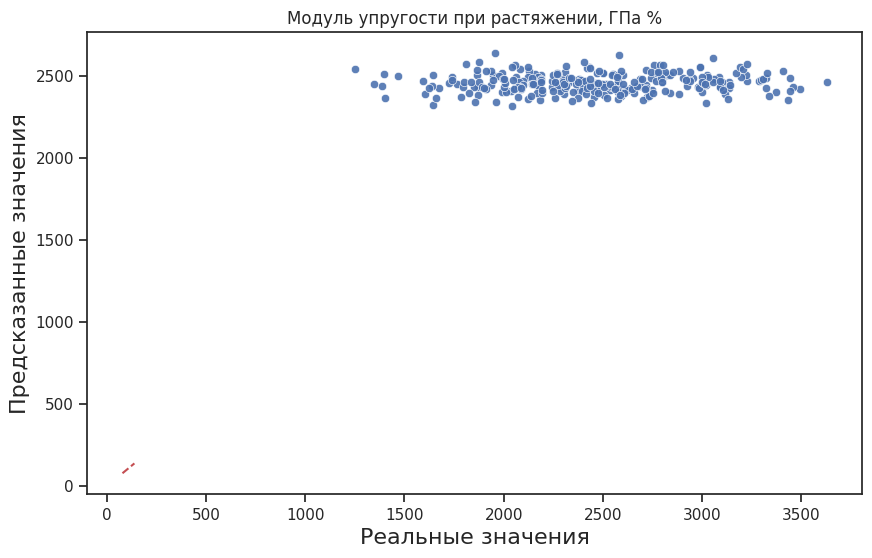

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.iloc[:,0], y=y_pred[:,0], alpha=0.9)
line_X = np.linspace(80, 140, 140)
line_Y = line_X
plt.plot(line_X, line_Y, 'r--')
plt.title("Модуль упругости при растяжении, ГПа %", fontsize=12)
plt.xlabel('Реальные значения', fontsize=16)
plt.ylabel('Предсказанные значения', fontsize=16)
plt.show()

In [68]:
# Другой способ Ridge
ridge_reg = Ridge(alpha=0.0004, solver='lsqr')
ridge_reg.fit(X_train_norm, y_train_norm)

y_pred = scaler_norm_y.inverse_transform(ridge_reg.predict(X_test_norm))

ridge_r2 = r2_score(y_test, y_pred)
ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("---RIDGE REGRESSION---")
print("R2 score: "+str(ridge_r2))
print("Mean Absolute Error: "+str(ridge_mae))
print("Root Mean Squared Error: "+str(ridge_rmse))

---RIDGE REGRESSION---
R2 score: 0.0005502441968500138
Mean Absolute Error: 193.24284075728966
Root Mean Squared Error: 238.54789038583763


Lasso **regression**

In [69]:
# модель линейной регрессии Lasso
modelLasso = Lasso(alpha=0.001)
modelLasso.fit(X_train_norm,y_train_norm)
y_pred = scaler_norm_y.inverse_transform (modelLasso.predict(X_test_norm))
MAELasso_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAELasso_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Lasso_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Lasso_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAELasso_1)
print (MAELasso_2)
print (R2Lasso_1)
print (R2Lasso_2)

383.097866737492
2.457493958479991
0.002848723559773614
-0.0010797663056409945


In [70]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['Lasso_norm',MAELasso_1])
MAE_y2.append(['Lasso_norm',MAELasso_2])
R2_y1.append(['Lasso_norm',R2Lasso_1])
R2_y2.append(['Lasso_norm',R2Lasso_2])

In [71]:
print(modelLasso.coef_)

[[-0.         -0.02376442  0.02347133 -0.06139133 -0.         -0.
  -0.          0.         -0.0013805  -0.00205517  0.00872139]
 [-0.         -0.          0.01495655 -0.01117377  0.00627417  0.00937457
   0.          0.02608957  0.01651856 -0.00966777  0.        ]]


ElasticNet **regression**

In [ ]:
# модель линейной регрессии ElasticNet
modelElastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
modelElastic.fit(X_train_norm,y_train_norm)
y_pred = scaler_norm_y.inverse_transform (modelElastic.predict(X_test_norm))
MAEElastic_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEElastic_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Elastic_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Elastic_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAEElastic_1)
print (MAEElastic_2)
print (R2Elastic_1)
print (R2Elastic_2)

In [75]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['Elastic_norm',MAEElastic_1])
MAE_y2.append(['Elastic_norm',MAEElastic_2])
R2_y1.append(['Elastic_norm',R2Elastic_1])
R2_y2.append(['Elastic_norm',R2Elastic_2])

In [76]:
print(modelElastic.coef_)

[[-0. -0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
 [-0. -0.  0. -0.  0.  0.  0.  0.  0. -0.  0.]]


**GradientBoostingRegressor**

In [77]:
# модель регрессии GradientBoostingRegressor
modelGBR_1 = GradientBoostingRegressor()
modelGBR_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelGBR_1.predict(X_test_norm)
modelGBR_2 = GradientBoostingRegressor()
modelGBR_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelGBR_2.predict(X_test_norm)
y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAEGBR_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEGBR_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2GBR_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2GBR_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAEGBR_1)
print (MAEGBR_2)
print (R2GBR_1)
print (R2GBR_2)

393.31961082972776
2.5434386292325075
-0.04899487571095462
-0.07725650252297855


In [78]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['GBR_norm',MAEGBR_1])
MAE_y2.append(['GBR_norm',MAEGBR_2])
R2_y1.append(['GBR_norm',R2GBR_1])
R2_y2.append(['GBR_norm',R2GBR_2])

**KNeighborsRegressor**

In [79]:
modelNeihg_1 = KNeighborsRegressor(n_neighbors=13)
modelNeihg_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelNeihg_1.predict(X_test_norm)
modelNeihg_2 = KNeighborsRegressor()
modelNeihg_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelNeihg_2.predict(X_test_norm)
y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAENeihg_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAENeihg_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Neihg_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Neihg_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAENeihg_1)
print (MAENeihg_2)
print (R2Neihg_1)
print (R2Neihg_2)

391.2828506285685
2.6327301135045733
-0.051443416391736996
-0.19732065675533494


In [80]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['KNeighborsRegressor_norm',MAENeihg_1])
MAE_y2.append(['KNeighborsRegressor_norm',MAENeihg_2])
R2_y1.append(['KNeighborsRegressor_norm',R2Neihg_1])
R2_y2.append(['KNeighborsRegressor_norm',R2Neihg_2])

**DecisionTreeRegressor**

In [72]:
# модель регрессии DecisionTreeRegressor
modelTree_1 = DecisionTreeRegressor(max_depth=3)
modelTree_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelTree_1.predict(X_test_norm)

modelTree_2 = DecisionTreeRegressor(max_depth=5)
modelTree_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelTree_2.predict(X_test_norm)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAETree_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAETree_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Tree_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Tree_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAETree_1)
print (MAETree_2)
print (R2Tree_1)
print (R2Tree_2)

392.6675327872711
2.736773677797954
-0.09040396890291702
-0.2869552623428291


In [73]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['DecisionTreeRegressor_norm',MAETree_1])
MAE_y2.append(['DecisionTreeRegressor_norm',MAETree_2])
R2_y1.append(['DecisionTreeRegressor_norm',R2Tree_1])
R2_y2.append(['DecisionTreeRegressor_norm',R2Tree_2])

**RandomForestRegressor**

In [81]:
# модель регрессии RandomForestRegressor
modelForest_1 = RandomForestRegressor(max_depth=5)
modelForest_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelForest_1.predict(X_test_norm)

modelForest_2 = RandomForestRegressor(max_depth=5)
modelForest_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelForest_2.predict(X_test_norm)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAEForest_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEForest_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Forest_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Forest_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAEForest_1)
print (MAEForest_2)
print (R2Forest_1)
print (R2Forest_2)

383.5382563617535
2.486952648189438
0.003986102941160974
-0.022686735783993495


In [82]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['RandomForestRegressor_norm',MAEForest_1])
MAE_y2.append(['RandomForestRegressor_norm',MAEForest_2])
R2_y1.append(['RandomForestRegressor_norm',R2Forest_1])
R2_y2.append(['RandomForestRegressor_norm',R2Forest_2])

**AdaBoostRegressor**

In [83]:
# модель регрессии AdaBoostRegressor
modelAda_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=1000)
modelAda_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_1 = modelAda_1.predict(X_test_norm)

modelAda_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=1000)
modelAda_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_2 = modelAda_2.predict(X_test_norm)

y_pred = np.vstack((y_pred_1,y_pred_2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAEAda_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEAda_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Ada_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Ada_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAEAda_1)
print (MAEAda_2)
print (R2Ada_1)
print (R2Ada_2)

398.7506561683497
2.592727663255292
-0.06301776456939856
-0.13413194813612161


In [84]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['AdaBoostRegressor_norm',MAEAda_1])
MAE_y2.append(['AdaBoostRegressor_norm',MAEAda_2])
R2_y1.append(['AdaBoostRegressor_norm',R2Ada_1])
R2_y2.append(['AdaBoostRegressor_norm',R2Ada_2])

Полносвязная нейронная **сеть**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
19/19 - 1s - loss: 0.0532 - mae: 0.1810 - val_loss: 0.0331 - val_mae: 0.1468 - 1s/epoch - 67ms/step
Epoch 2/100
19/19 - 0s - loss: 0.0417 - mae: 0.1628 - val_loss: 0.0274 - val_m

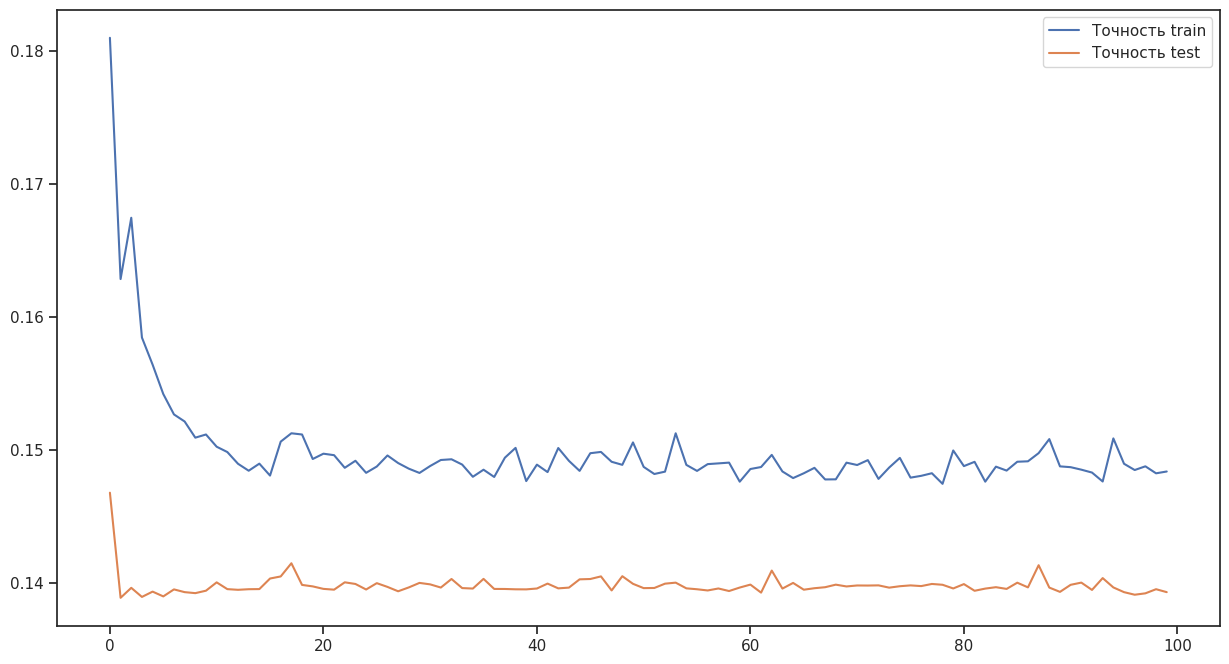

In [85]:
# модель полносвязной нейронной сети для целевого параметра y1
modelNN_y1 = Sequential()
modelNN_y1.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_y1.add(Dropout(0.5))
modelNN_y1.add(Dense(32, activation = 'sigmoid'))
modelNN_y1.add(Dense(1, activation = 'tanh'))
modelNN_y1.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1.summary()
history = modelNN_y1.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                192       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
19/19 - 1s - loss: 0.2812 - mae: 0.4958 - val_loss: 0.1775 - val_mae: 0.3876 - 984ms/epoch - 52ms/step
Epoch 2/80
19/19 - 0s - loss: 0.1058 - mae: 0.2671 - val_loss: 0.0437 - va

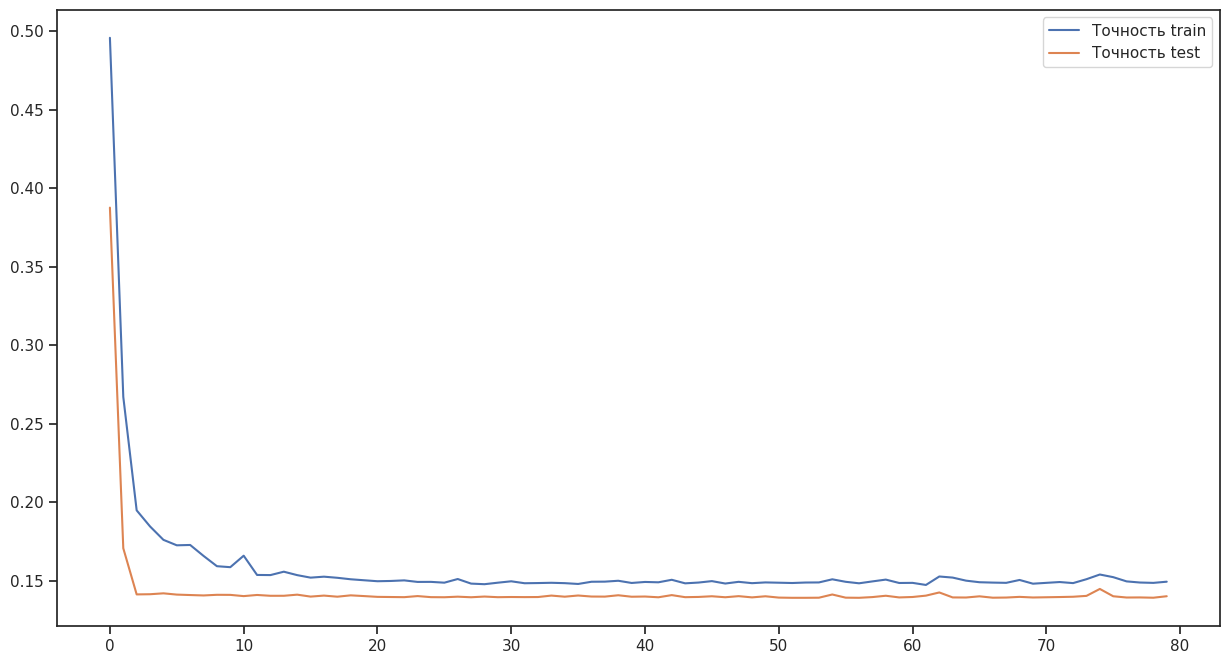

In [86]:
# модель полносвязной нейронной сети для целевого параметра y1 тренируем на нормализованных данных
modelNN_y1_1 = Sequential()
modelNN_y1_1.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_y1_1.add(Dropout(0.5))
modelNN_y1_1.add(Dense(32, activation = 'sigmoid'))
modelNN_y1_1.add(Dense(1, activation = 'relu'))
modelNN_y1_1.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1_1.summary()
history = modelNN_y1_1.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=80, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                384       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 1)                

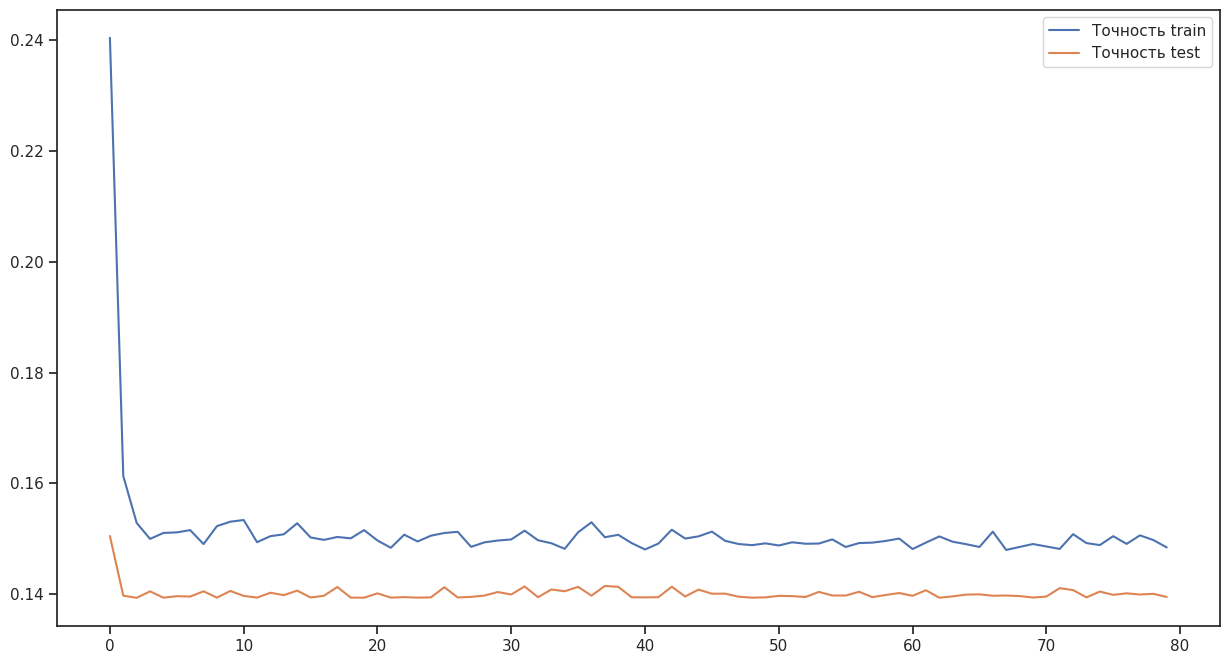

In [87]:
# модель полносвязной нейронной сети для целевого параметра y1 тренируем на нормализованных данных
modelNN_y1_2 = Sequential([
                Dense(32,  input_dim=11, activation = 'sigmoid'),
                Dropout(0.5),
                Dense(64, activation = 'sigmoid'),
                Dropout(0.5),
                Dense(32, activation = 'sigmoid'),
                Dense(16, activation = 'sigmoid'),
                Dense(1, activation = 'linear')])
modelNN_y1_2.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1_2.summary()
history = modelNN_y1_2.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=80, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 16)                192       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 32)                544       
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
19/19 - 1s - loss: 1.1149 - mae: 1.0295 - val_loss: 0.6895 - val_mae: 0.8078 - 996ms/epoch - 52ms/step
Epoch 2/50
19/19 - 0s - loss: 0.3251 - mae: 0.5070 - val_loss: 0.1043 - va

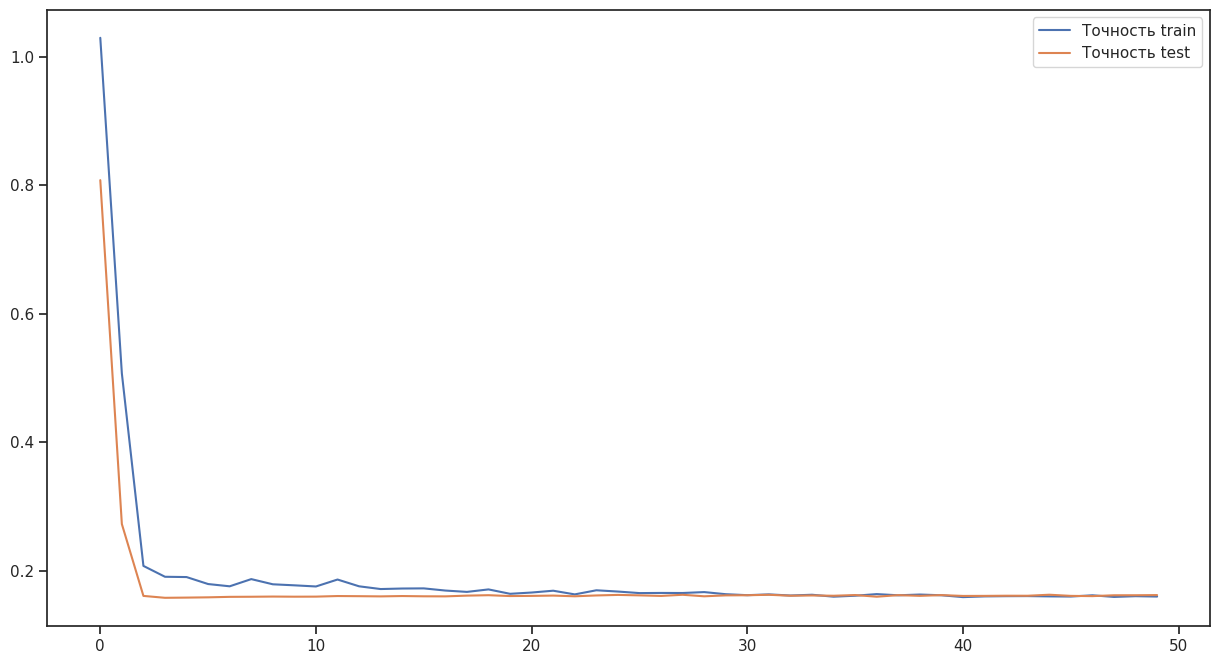

In [89]:
# модель полносвязной нейронной сети для целевого параметра y2 тренируем на нормализованных данных
modelNN_y2 = Sequential()
modelNN_y2.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_y2.add(Dropout(0.5))
modelNN_y2.add(Dense(32, activation = 'sigmoid'))
modelNN_y2.add(Dense(1, activation = 'tanh'))
modelNN_y2.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y2.summary()
history = modelNN_y2.fit(X_train_norm,y_train_norm.iloc[:,1], 
                    epochs=50, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

In [90]:
y_pred_1 = modelNN_y1.predict(X_test_norm)
y_pred_2 = modelNN_y2.predict(X_test_norm)

y_pred = np.hstack((y_pred_1,y_pred_2))
y_pred = scaler_norm_y.inverse_transform (y_pred)


MAENN_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
print (MAENN_1)
MAENN_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAENN_2)

9/9 [==============================] - 0s 2ms/step
383.8018364692841
2.4480444324192083


In [91]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['NeuralNetwork_norm',MAENN_1])
MAE_y2.append(['NeuralNetwork_norm',MAENN_2])

In [92]:
# Результаты расчета ошибок моделей при предсказании целевого признака "Модуль упругости при растяжении, ГПа"
MAE_y1

[['Ridge_norm', 383.54303066341294],
 ['Lasso_norm', 383.097866737492],
 ['DecisionTreeRegressor_norm', 392.6675327872711],
 ['Elastic_norm', 383.6141264048189],
 ['GBR_norm', 393.31961082972776],
 ['KNeighborsRegressor_norm', 391.2828506285685],
 ['RandomForestRegressor_norm', 383.5382563617535],
 ['AdaBoostRegressor_norm', 398.7506561683497],
 ['NeuralNetwork_norm', 383.8018364692841]]

In [93]:
# Результаты расчета ошибок моделей при предсказании целевого признака "Прочность при растяжении, МПа"
MAE_y2

[['Ridge_norm', 2.455325358218636],
 ['Lasso_norm', 2.457493958479991],
 ['DecisionTreeRegressor_norm', 2.736773677797954],
 ['Elastic_norm', 2.451154883756544],
 ['GBR_norm', 2.5434386292325075],
 ['KNeighborsRegressor_norm', 2.6327301135045733],
 ['RandomForestRegressor_norm', 2.486952648189438],
 ['AdaBoostRegressor_norm', 2.592727663255292],
 ['NeuralNetwork_norm', 2.4480444324192083]]

In [94]:
#  результаты MAE
a = np.array(MAE_y1)
b = np.array(MAE_y2)

MAE_errors = pd.DataFrame({'Модель регрессии': a[:,0], 'MAE Модуль упругости при растяжении, ГПа': a[:,1], 
                             'MAE Прочность при растяжении, МПа': b[:,1]})
MAE_errors = MAE_errors.astype({'MAE Модуль упругости при растяжении, ГПа': np.float16, 'MAE Прочность при растяжении, МПа': np.float16})
MAE_errors

,Модель регрессии,"MAE Модуль упругости при растяжении, ГПа","MAE Прочность при растяжении, МПа"
0,Ridge_norm,383.50,2.455078
1,Lasso_norm,383.00,2.457031
2,DecisionTreeRegressor_norm,392.75,2.736328
3,Elastic_norm,383.50,2.451172
4,GBR_norm,393.25,2.542969
5,KNeighborsRegressor_norm,391.25,2.632812
6,RandomForestRegressor_norm,383.50,2.486328
7,AdaBoostRegressor_norm,398.75,2.591797
8,NeuralNetwork_norm,383.75,2.447266


In [95]:
# результаты R2 
a = np.array(R2_y1)
b = np.array(R2_y2)
R2_errors = pd.DataFrame({'Модель регрессии': a[:,0], 'R2 Модуль упругости при растяжении, ГПа': a[:,1], 
                             'R2 Прочность при растяжении, МПа': b[:,1]})
R2_errors = R2_errors.astype({'R2 Модуль упругости при растяжении, ГПа': np.float16, 'R2 Прочность при растяжении, МПа': np.float16})
R2_errors

,Модель регрессии,"R2 Модуль упругости при растяжении, ГПа","R2 Прочность при растяжении, МПа"
0,Ridge_norm,0.002724,0.001235
1,Lasso_norm,0.002850,-0.001080
2,DecisionTreeRegressor_norm,-0.090393,-0.286865
3,Elastic_norm,-0.000235,-0.000864
4,GBR_norm,-0.048981,-0.077271
5,KNeighborsRegressor_norm,-0.051453,-0.197266
6,RandomForestRegressor_norm,0.003986,-0.022690
7,AdaBoostRegressor_norm,-0.062988,-0.134155


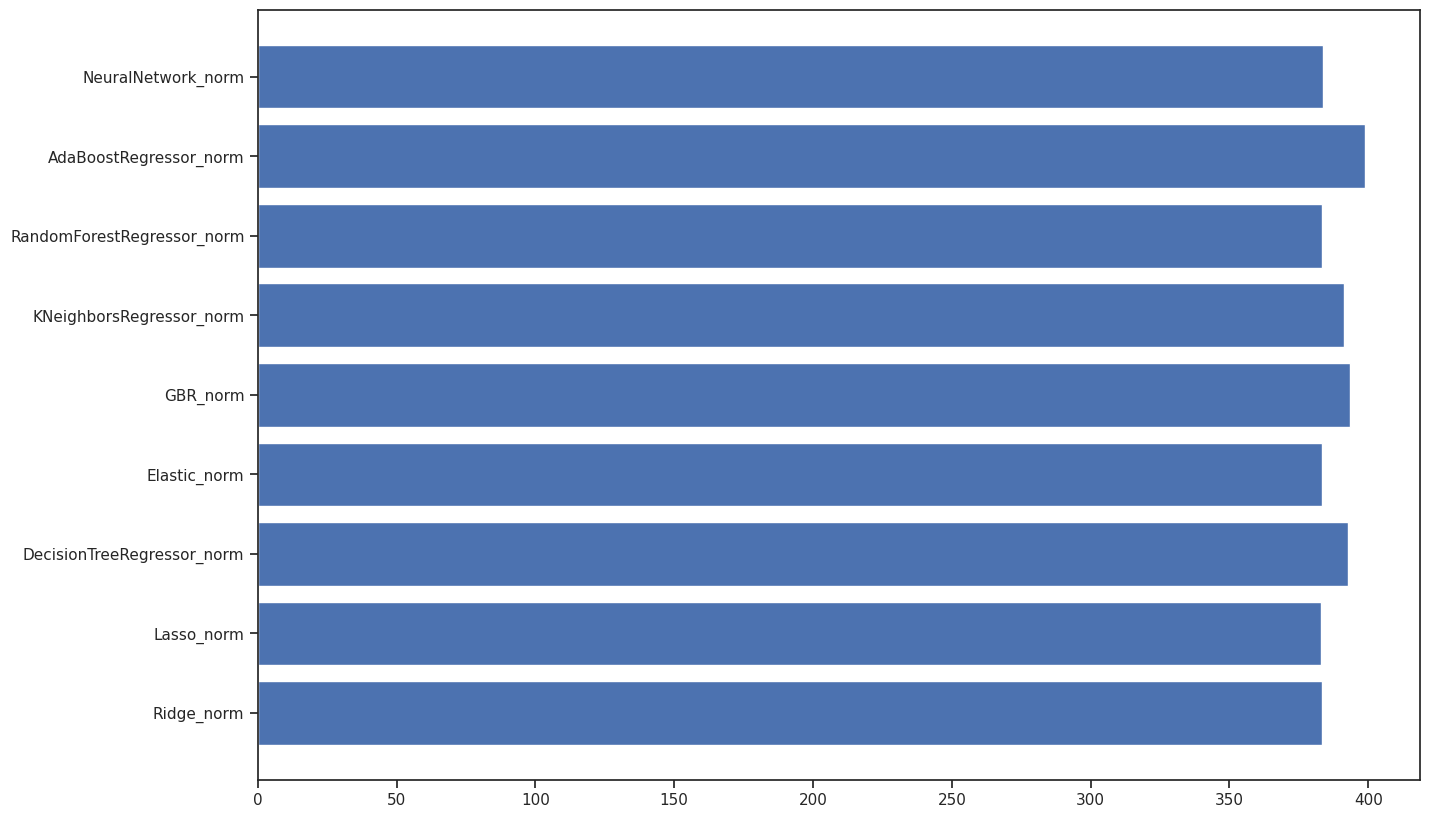

In [96]:
# Построим гистограмму ошибки
plt.figure(figsize=(15, 10))
plt.barh(MAE_errors['Модель регрессии'], MAE_errors['MAE Модуль упругости при растяжении, ГПа'])
plt.show()

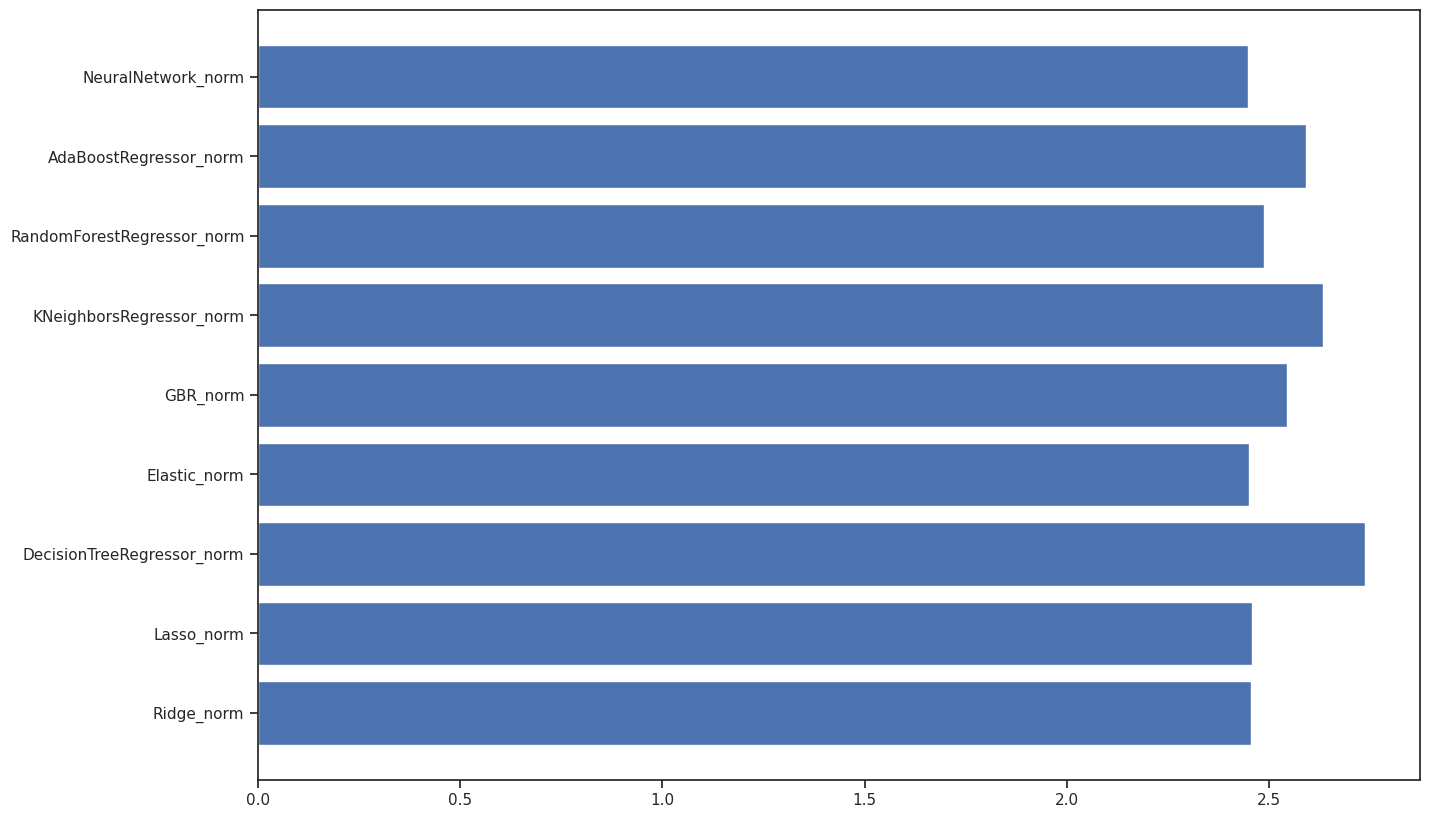

In [97]:
# Построим гистограмму ошибки
plt.figure(figsize=(15, 10))
plt.barh(MAE_errors['Модель регрессии'], MAE_errors['MAE Прочность при растяжении, МПа'])
plt.show()

In [98]:
# Запишем результаты сравнения в файл
MAE_errors.to_excel('MAE_errors.xlsx')
R2_errors.to_excel('R2_errors.xlsx')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               1200      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 50)                5050      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_19 (Dense)            (None, 25)                1275      
                                                                 
 dense_20 (Dense)            (None, 1)                 26        
                                                                 
Total params: 7,551
Trainable params: 7,551
Non-traina

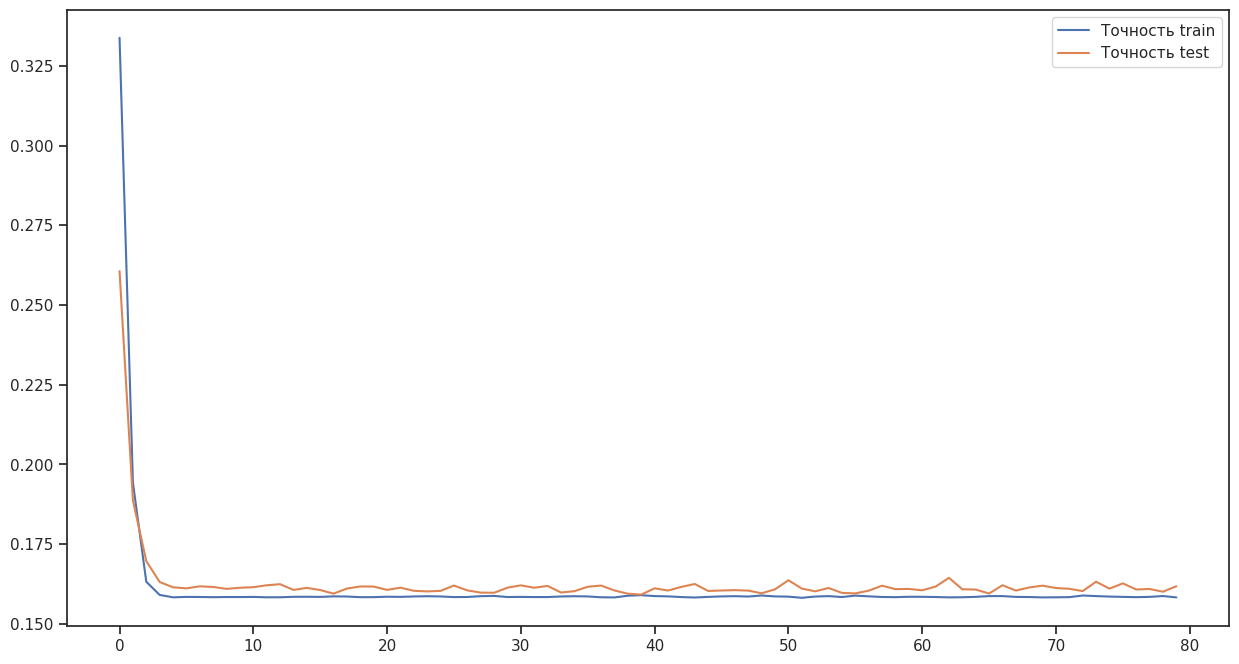

In [99]:
model_y2= Sequential()
model_y2.add(Dense(100, input_dim=11, activation='sigmoid'))
model_y2.add(LeakyReLU(alpha=1.0))
model_y2.add(Dense(50, activation='sigmoid'))
model_y2.add(LeakyReLU(alpha=1.0))
model_y2.add(Dense(25, activation='softmax'))

#IMPORTANT PART
model_y2.add(Dense(1, activation='linear'))
model_y2.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_y2.summary()
history = model_y2.fit(X_train_norm,y_train_norm.iloc[:,1], 
                    epochs=80, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               1200      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 50)                5050      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_23 (Dense)            (None, 25)                1275      
                                                                 
 dense_24 (Dense)            (None, 1)                 26        
                                                                 
Total params: 7,551
Trainable params: 7,551
Non-traina

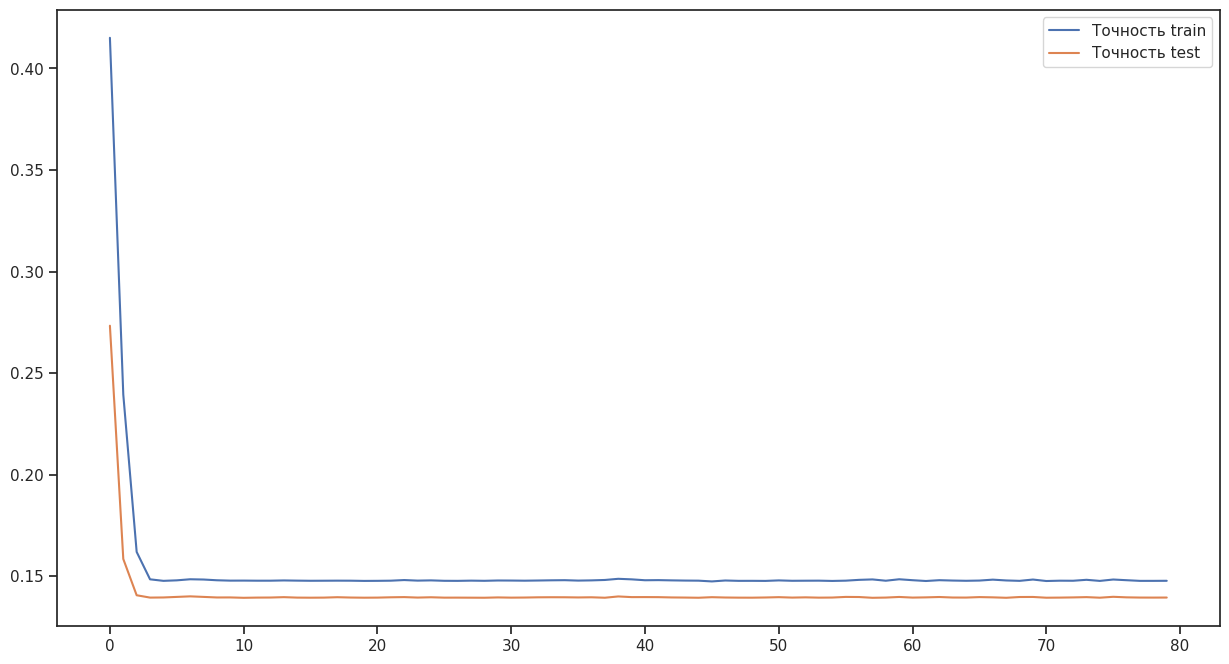

In [100]:
model_y1 = Sequential()
model_y1.add(Dense(100, input_dim=11, activation='sigmoid'))
model_y1.add(LeakyReLU(alpha=1.0))
model_y1.add(Dense(50, activation='sigmoid'))
model_y1.add(LeakyReLU(alpha=1.0))
model_y1.add(Dense(25, activation='softmax'))

#IMPORTANT PART
model_y1.add(Dense(1, activation='linear'))
model_y1.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_y1.summary()
history = model_y1.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=80, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

In [101]:
y_pred1 = model_y1.predict(X_test_norm)
y_pred2 = model_y2.predict(X_test_norm)

y_pred = np.hstack((y_pred1,y_pred2))
y_pred = scaler_norm_y.inverse_transform (y_pred)


MAEmodel_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
print (MAEmodel_1)
MAEmodel_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAEmodel_2)

R2model_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2model_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (R2model_1)
print (R2model_2)

9/9 [==============================] - 0s 2ms/step
383.6805351037519
2.4521366798967157
-0.00016756543586216033
0.000141627363921204
